## Advanced Regression Assignment: E-mail: khalidomarasu@gmail.com
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.

## 0 : Import required  libraries and Supress warnings.

In [1]:
# Importing Libraries to be used:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import datetime
# Model Learning Libraries 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
import os

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Setting max rows and columns to display while loading a dataframe:
pd.set_option("display.max_rows",100)
pd.set_option("display.max_columns",100)

## 1 : Reading and Understanding the dataset.

In [3]:
# Reading the housing dataset.

Houses_df = pd.read_csv("train.csv")

In [4]:
# Displaying top 5 rows of the dataset. 

Houses_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Determining the size of the dataset.
Houses_df.shape

(1460, 81)

> The dataset has 1460 rows and 81 columns

In [6]:
# Describe the data.

Houses_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# Checking datatypes of columns:
Houses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

> The data set has 38 Numerical columns and 43 Categorical as a first judge:

In [8]:
# List column names in housing dataframe:
Houses_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## 2 : Data Cleaning

In [9]:
# Checking the percentage of missing values in dataset columns:
null_count = round(Houses_df.isnull().sum() * 100 / len(Houses_df), 2).sort_values(ascending = False)
null_count

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageYrBlt       5.55
GarageCond        5.55
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
BsmtFinType2      2.60
BsmtExposure      2.60
BsmtQual          2.53
BsmtCond          2.53
BsmtFinType1      2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Id                0.00
Functional        0.00
Fireplaces        0.00
KitchenQual       0.00
KitchenAbvGr      0.00
BedroomAbvGr      0.00
HalfBath          0.00
FullBath          0.00
BsmtHalfBath      0.00
TotRmsAbvGrd      0.00
GarageCars        0.00
GrLivArea         0.00
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
EnclosedPorch     0.00
3SsnPorch         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleConditi

In [10]:
# Removing the columns which have more than 80% of null values.

Houses_df = Houses_df.drop(["PoolQC", "MiscFeature", "Alley", "Fence","FireplaceQu"], axis = 1)
Houses_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [11]:
# Check the shape of dataset.

Houses_df.shape

(1460, 76)

In [12]:
# Replacing all categorical null values with None as per the dictionary NA means Not available.
#for col in ('MasVnrType','FireplaceQu', 'Electrical'):
    
#    Houses_df[col]=Houses_df[col].fillna('None')
    
#    cc

In [13]:
# Again Check the missing percentage of missing values in dataset after dropping columns.

null_count = round(Houses_df.isnull().sum() * 100 / len(Houses_df), 2).sort_values(ascending = False).head(10)
null_count

LotFrontage     17.74
GarageType       5.55
GarageCond       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtCond         2.53
dtype: float64

> LotFrontage

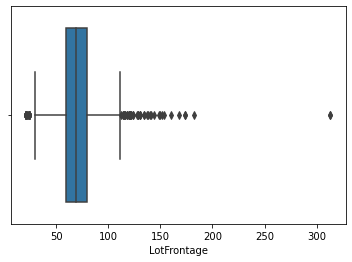

In [14]:
# Plot a boxplot to check the skewness of data in column so we can decide to use mean or median.

sns.boxplot(Houses_df.LotFrontage)
plt.show()

In [15]:
# For "LotFrontage" column check imputation value.
Houses_df["LotFrontage"].median()

69.0

In [16]:
# Replacing null values with the median value for the column LotFrontage.

Houses_df["LotFrontage"] = Houses_df["LotFrontage"].fillna(69.0)

> GarageYrBlt

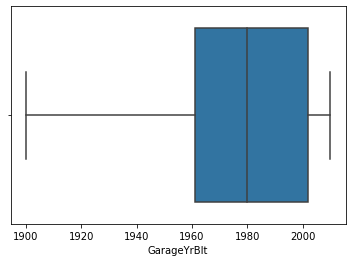

In [17]:
# Plot a boxplot to check the skewness of data in column so we can decide to use mean or median.

sns.boxplot(Houses_df.GarageYrBlt)
plt.show()

In [18]:
# For "GarageYrBlt" NA represents no garage as per dictionary 

Houses_df["GarageYrBlt"].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [19]:
# thus we will add a value of -1  in "GarageYrBlt" columns for houses with no garage.

Houses_df["GarageYrBlt"] = Houses_df["GarageYrBlt"].fillna(-1)

> MasVnrArea

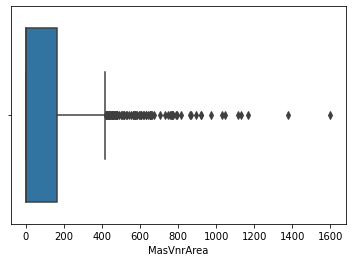

In [20]:
# Plot a boxplot to check the skewness of data in column so we can decide to use mean or median.

sns.boxplot(Houses_df.MasVnrArea)
plt.show()

In [21]:
# "MasVnrArea" check the data dsitrbution to detrmine data fixing value:

Houses_df["MasVnrArea"].value_counts()

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [22]:
# Replacing NA in "MasVnrArea" column with Mode Value:
Houses_df["MasVnrArea"] = Houses_df["MasVnrArea"].fillna(0.0)

In [23]:
# Checking Null % again: Checkpoint
null_count = round(Houses_df.isnull().sum() * 100 / len(Houses_df), 2).sort_values(ascending = False).head(20)
null_count

GarageType      5.55
GarageFinish    5.55
GarageQual      5.55
GarageCond      5.55
BsmtExposure    2.60
BsmtFinType2    2.60
BsmtFinType1    2.53
BsmtQual        2.53
BsmtCond        2.53
MasVnrType      0.55
Electrical      0.07
FullBath        0.00
BsmtHalfBath    0.00
TotRmsAbvGrd    0.00
BsmtFullBath    0.00
HalfBath        0.00
GrLivArea       0.00
LowQualFinSF    0.00
BedroomAbvGr    0.00
KitchenAbvGr    0.00
dtype: float64

>Analayzing categorical variables with NA value Garage and Basement Columns:

In [24]:
# Imputing the values in categorical columns with NA.

Houses_df["GarageFinish"] = Houses_df["GarageFinish"].fillna("No_Garage")
Houses_df["GarageType"] = Houses_df["GarageType"].fillna("No_Garage")
Houses_df["GarageCond"] = Houses_df["GarageCond"].fillna("No_Garage")
Houses_df["GarageQual"] = Houses_df["GarageQual"].fillna("No_Garage")
Houses_df["BsmtExposure"] = Houses_df["BsmtExposure"].fillna("No_Basement")
Houses_df["BsmtFinType1"] = Houses_df["BsmtFinType1"].fillna("No_Basement")
Houses_df["BsmtFinType2"] = Houses_df["BsmtFinType2"].fillna("No_Basement")
Houses_df["BsmtCond"] = Houses_df["BsmtCond"].fillna("No_Basement")
Houses_df["BsmtQual"] = Houses_df["BsmtQual"].fillna("No_Basement")

In [25]:
null_count = round(Houses_df.isnull().sum() * 100 / len(Houses_df), 2).sort_values(ascending = False).head(20)
null_count

MasVnrType      0.55
Electrical      0.07
Id              0.00
HalfBath        0.00
Fireplaces      0.00
Functional      0.00
TotRmsAbvGrd    0.00
KitchenQual     0.00
KitchenAbvGr    0.00
BedroomAbvGr    0.00
FullBath        0.00
HeatingQC       0.00
BsmtHalfBath    0.00
BsmtFullBath    0.00
GrLivArea       0.00
LowQualFinSF    0.00
2ndFlrSF        0.00
1stFlrSF        0.00
GarageType      0.00
GarageYrBlt     0.00
dtype: float64

> MasVnrType

In [26]:
Houses_df["MasVnrType"].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [27]:
# Imputing mode value in "MasVnrType" columns.
Houses_df["MasVnrType"] = Houses_df["MasVnrType"].fillna("None")

> Electrical

In [28]:
Houses_df["Electrical"].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [29]:
# # Imputing mode value in "Electrical" column:

Houses_df["Electrical"] = Houses_df["Electrical"].fillna("SBrkr")

In [30]:
# Again Check the missing percentage of missing values in dataset after imputing values in missing places.

null_count = round(Houses_df.isnull().sum() * 100 / len(Houses_df), 2).sort_values(ascending = False).head(10)
null_count

Id              0.0
FullBath        0.0
Fireplaces      0.0
Functional      0.0
TotRmsAbvGrd    0.0
KitchenQual     0.0
KitchenAbvGr    0.0
BedroomAbvGr    0.0
HalfBath        0.0
BsmtHalfBath    0.0
dtype: float64

Now the dataset has no null values or missing values.

### Derived Metrics:

In [31]:
# Derving the a new column from current year and year built for house Age.
Houses_df["Current_Year"] = datetime.datetime.now().year
Houses_df["HouseAge"] = Houses_df["Current_Year"] - Houses_df["YearBuilt"]
Houses_df.drop(["Current_Year", "YearBuilt"], axis = 1, inplace = True)

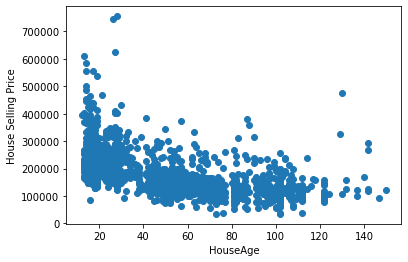

In [32]:
# See the relation between the house age and the Sale price of iy:
plt.scatter(x = Houses_df["HouseAge"], y = Houses_df["SalePrice"])
plt.xlabel("HouseAge") 
plt.ylabel("House Selling Price")
plt.show()

In [33]:
# Deriving a new column as Garage span.
Houses_df["Current_Year"] = datetime.datetime.now().year
Houses_df["Garage_Span"] = Houses_df["Current_Year"] - Houses_df["GarageYrBlt"]
Houses_df.drop(["Current_Year", "GarageYrBlt"], axis = 1, inplace = True)

In [34]:
# For the House which has no Garage Has age as 2023 as a result of 2022--1 after conversion. So we will replace it with -1 representing no garage.
Houses_df["Garage_Span"] = Houses_df["Garage_Span"].replace(2023.0, -1)

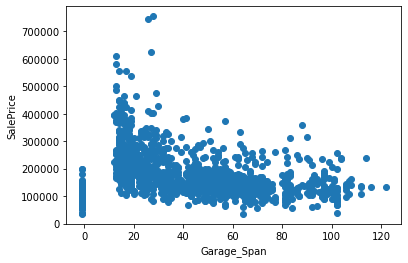

In [35]:
plt.scatter(x = Houses_df["Garage_Span"], y = Houses_df["SalePrice"])
plt.xlabel("Garage_Span") 
plt.ylabel("SalePrice")
plt.show()

In [36]:
 # Deriving a new column Remodeled Lifetime of the Houses:
Houses_df["Current_Year"] = datetime.datetime.now().year
Houses_df["Remodeled_HLifetime"] = Houses_df["Current_Year"] - Houses_df["YearRemodAdd"]
Houses_df.drop(["Current_Year", "YearRemodAdd"], axis = 1, inplace = True)

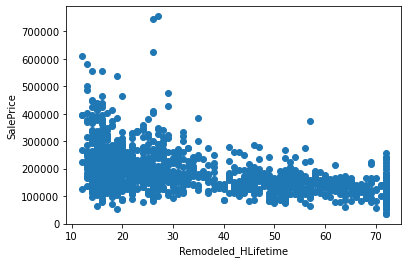

In [37]:
plt.scatter(x = Houses_df["Remodeled_HLifetime"], y = Houses_df["SalePrice"])
plt.xlabel("Remodeled_HLifetime") 
plt.ylabel("SalePrice")
plt.show()

In [38]:
# Deriving the span passed since the house was last sold:
Houses_df["Current_Year"] = datetime.datetime.now().year
Houses_df["Years_Since_Sold"] = Houses_df["Current_Year"] - Houses_df["YrSold"]
Houses_df.drop(["Current_Year", "YrSold"], axis = 1, inplace = True)

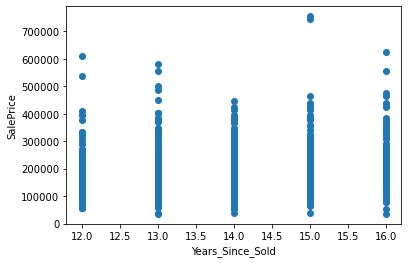

In [39]:
plt.scatter(x = Houses_df["Years_Since_Sold"], y = Houses_df["SalePrice"])
plt.xlabel("Years_Since_Sold") 
plt.ylabel("SalePrice")
plt.show()

#### Analyzing skewed columns to drop them if found:

In [40]:
# Skewness Check in columns by identifying the repetition or count of unique values in all categorical columns:
for columns in Houses_df:
    print(Houses_df[columns].astype('category').value_counts(normalize = True) * 100)
    print("*******************************************")

1       0.068493
982     0.068493
980     0.068493
979     0.068493
978     0.068493
          ...   
485     0.068493
484     0.068493
483     0.068493
482     0.068493
1460    0.068493
Name: Id, Length: 1460, dtype: float64
*******************************************
20     36.712329
60     20.479452
50      9.863014
120     5.958904
30      4.726027
160     4.315068
70      4.109589
80      3.972603
90      3.561644
190     2.054795
85      1.369863
75      1.095890
45      0.821918
180     0.684932
40      0.273973
Name: MSSubClass, dtype: float64
*******************************************
RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64
*******************************************
69.0     18.493151
60.0      9.794521
70.0      4.794521
80.0      4.726027
50.0      3.904110
           ...    
38.0      0.068493
39.0      0.068493
111.0     0.068493
112.0     0.068493
128.0     0.068493
Name: Lot

GasA     97.808219
GasW      1.232877
Grav      0.479452
Wall      0.273973
OthW      0.136986
Floor     0.068493
Name: Heating, dtype: float64
*******************************************
Ex    50.753425
TA    29.315068
Gd    16.506849
Fa     3.356164
Po     0.068493
Name: HeatingQC, dtype: float64
*******************************************
Y    93.493151
N     6.506849
Name: CentralAir, dtype: float64
*******************************************
SBrkr    91.438356
FuseA     6.438356
FuseF     1.849315
FuseP     0.205479
Mix       0.068493
Name: Electrical, dtype: float64
*******************************************
864     1.712329
1040    1.095890
912     0.958904
848     0.821918
894     0.821918
          ...   
1150    0.068493
1146    0.068493
1143    0.068493
1141    0.068493
4692    0.068493
Name: 1stFlrSF, Length: 753, dtype: float64
*******************************************
0       56.780822
728      0.684932
504      0.616438
672      0.547945
546      0.547945
          ..

6     17.328767
7     16.027397
5     13.972603
4      9.657534
8      8.356164
3      7.260274
10     6.095890
11     5.410959
9      4.315068
12     4.041096
1      3.972603
2      3.561644
Name: MoSold, dtype: float64
*******************************************
WD       86.780822
New       8.356164
COD       2.945205
ConLD     0.616438
ConLI     0.342466
ConLw     0.342466
CWD       0.273973
Oth       0.205479
Con       0.136986
Name: SaleType, dtype: float64
*******************************************
Normal     82.054795
Partial     8.561644
Abnorml     6.917808
Family      1.369863
Alloca      0.821918
AdjLand     0.273973
Name: SaleCondition, dtype: float64
*******************************************
140000    1.369863
135000    1.164384
145000    0.958904
155000    0.958904
190000    0.890411
            ...   
164990    0.068493
164900    0.068493
164700    0.068493
163990    0.068493
755000    0.068493
Name: SalePrice, Length: 663, dtype: float64
*****************************

> Skweness in columns detected thus we will drop skewed columns which wil not affect our model or analysis further 90% unique values.

In [41]:
# Dropping skewed columns.
Houses_df = Houses_df.drop(["Street", "Utilities", "Condition2", "RoofMatl", "Heating", "LowQualFinSF", "3SsnPorch", "PoolArea", "ScreenPorch", "MiscVal"], axis = 1)

In [42]:
# Dropping ID column which wouldnt affect the prediction of house price to reduce model noise:
Houses_df = Houses_df.drop(["Id"], axis = 1)

In [43]:
# Check the dimensions of the dataset after dropping highly skewed column.
Houses_df.shape

(1460, 65)

4. Is the target variable is normally distributed ?

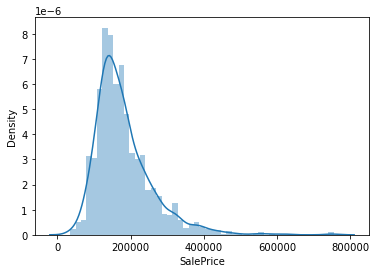

In [44]:
# Plot to check if target variable is normalized or skewed.
sns.distplot(Houses_df["SalePrice"])
plt.show()

#### The target variable "SalePrice" is skewed right  as seen abouve so we need to transform it so the model can learn on all data of price.


In [45]:
# Applying log transformation to obtain a centralized data.
Houses_df["SalePrice"] = np.log1p(Houses_df["SalePrice"])

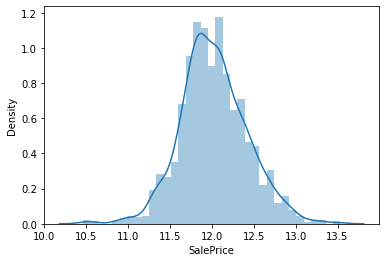

In [46]:
# Checking skewness and distribution after transformation is applied:
sns.distplot(Houses_df["SalePrice"])
plt.show()

5. EDA Analysis:

5. 1 Check outliers:

In [47]:
# Splitting the columns to targert, numerical and categorical to perforom further data cleaning and analysis:
Out_col = "SalePrice"

Numerical_cols = ["MSSubClass", "LotFrontage", "LotArea", "OverallQual", "OverallCond", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", 
               "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath", "FullBath", 
               "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageCars", "GarageArea", 
               "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "MoSold", "HouseAge", "Garage_Span", "Remodeled_HLifetime", 
               "Years_Since_Sold"]

Categorical_cols = ["MSZoning", "LotShape", "LandContour", "LotConfig", "LandSlope", "Neighborhood", "Condition1", "BldgType", 
                   "HouseStyle", "RoofStyle", "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond", 
                   "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", 
                   "CentralAir", "Electrical", "KitchenQual", "Functional", "GarageType", "GarageFinish", "GarageQual", 
                   "GarageCond", "PavedDrive", "SaleType", "SaleCondition"]

In [48]:
# Detect outlier by plotting box plot on all numerical columns:
def Outlier_detection(i, col_i):
    plt.figure(i)
    sns.boxplot(data =Houses_df[[col_i]])

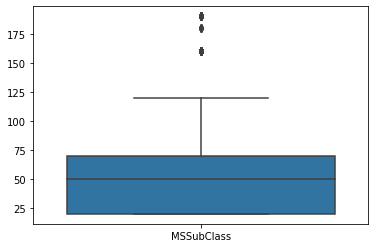

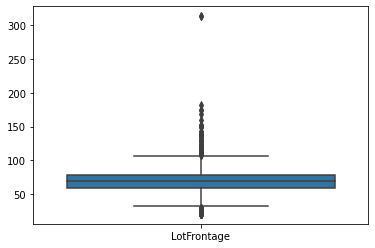

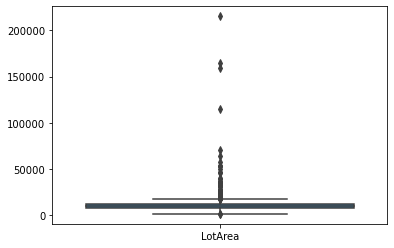

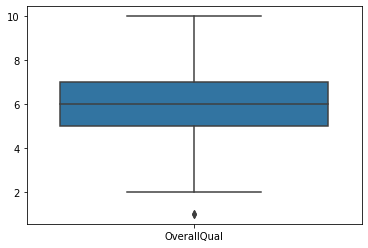

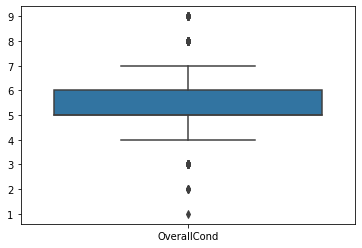

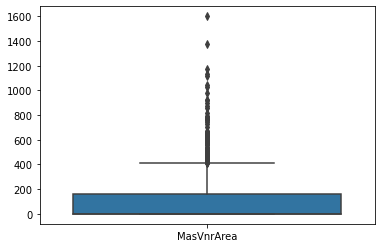

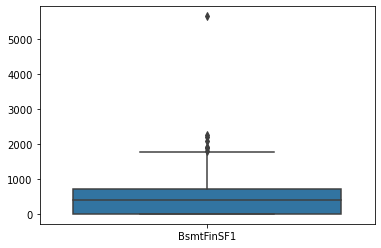

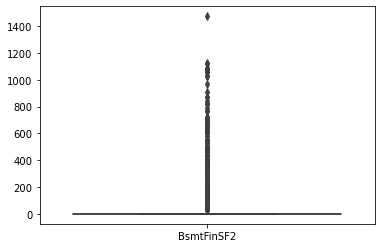

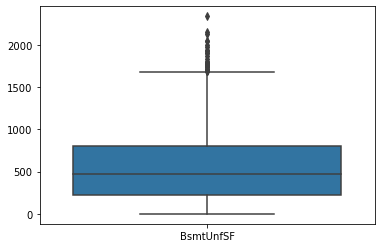

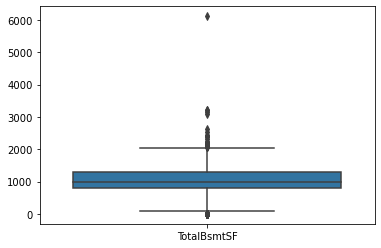

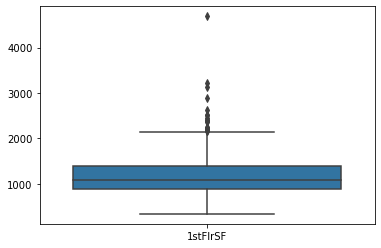

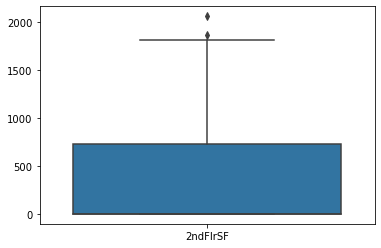

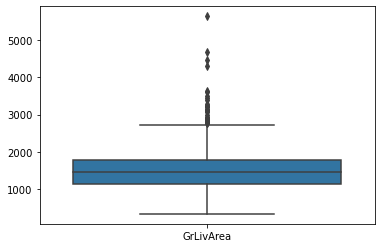

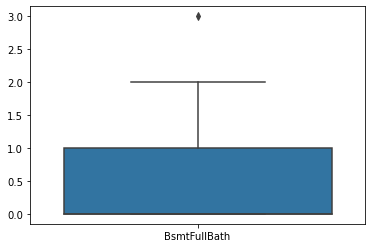

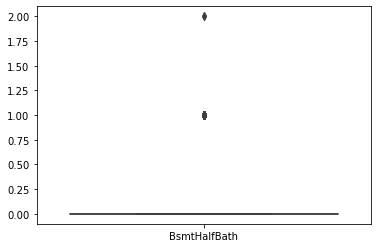

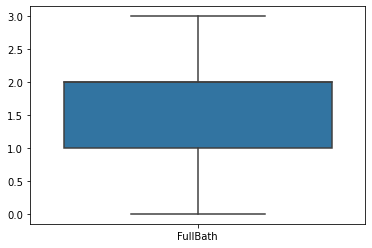

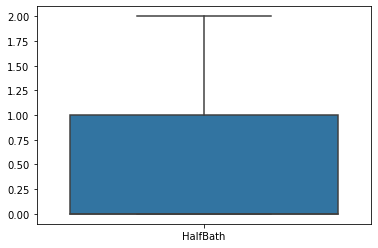

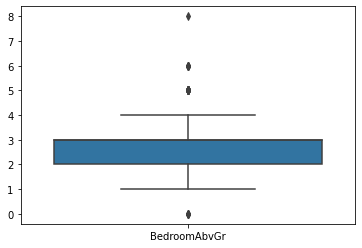

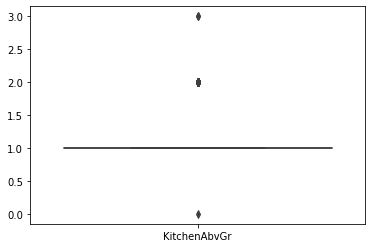

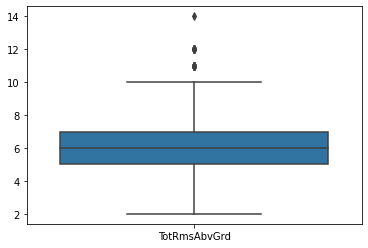

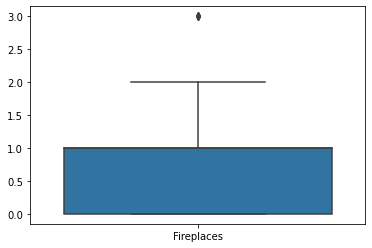

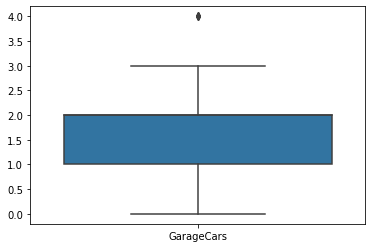

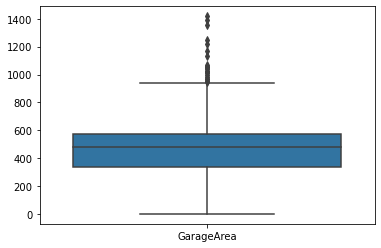

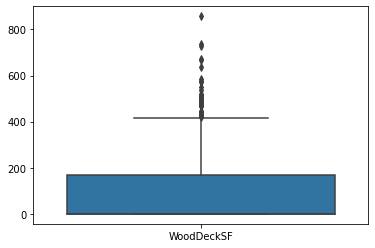

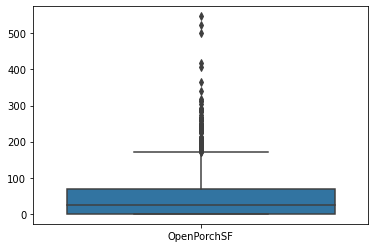

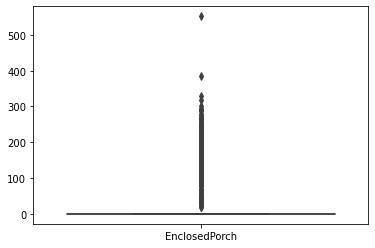

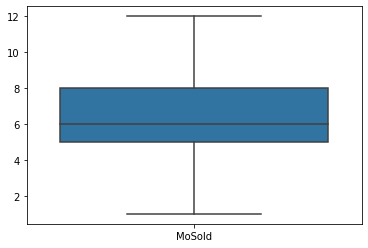

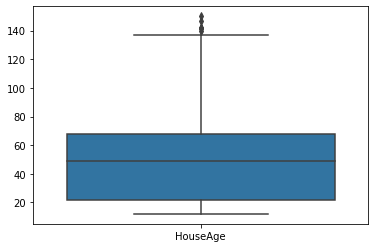

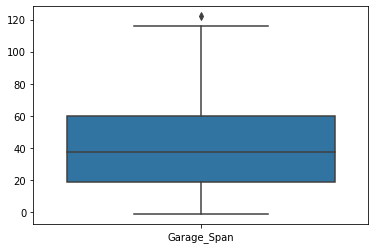

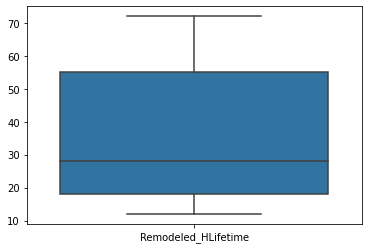

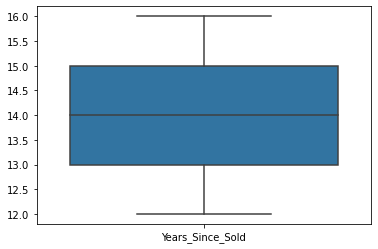

In [49]:
# Numerical column analysis for outliers.
for i, col in enumerate(Numerical_cols):
    Outlier_detection(i, col)

> Outliers in features are deteted but as  "SalePrice" was transformed using log transformation we will not be treating the outliers for independent features.

5. 2. Bivariate Analysis - Categorical Variables in relation to "SalePrice"  Target column :

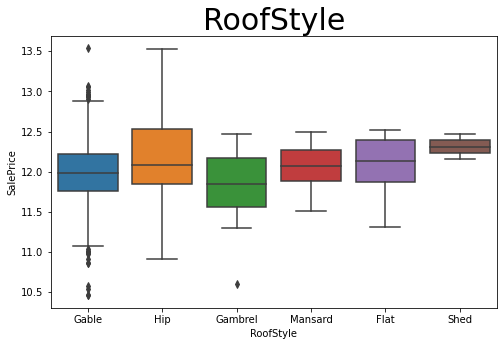

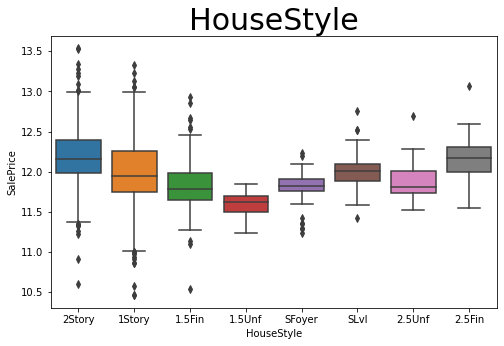

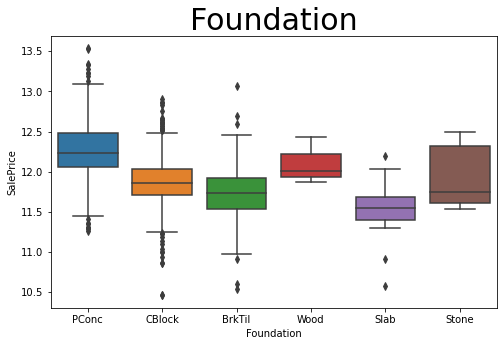

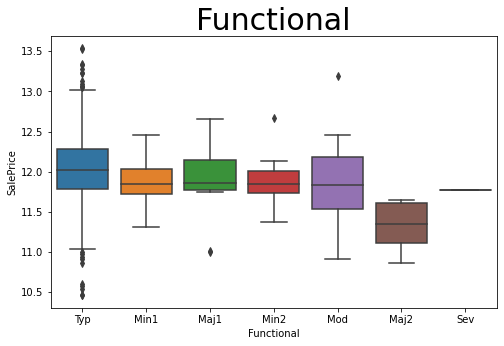

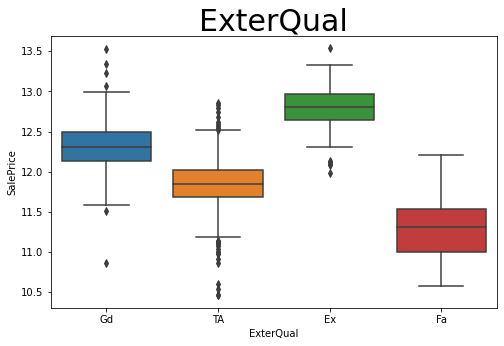

In [50]:
# Plot box plot for 5 Categorical columns with respect to SalePrice:

for i, variable in enumerate(['RoofStyle', 'HouseStyle', 'Foundation', 'Functional', 'ExterQual']):
    fig=plt.subplots(figsize=(8,5))
    sns.boxplot(x=variable, y="SalePrice", data= Houses_df)
    plt.xlabel(variable)
    plt.ylabel("SalePrice")
    plt.title(variable,fontsize=30)
    plt.show()

Findings :
1. RoofStyle Vs. Sales Price:
- Selling price of the house for different roofstyles variesm houses "Hip" roofstyle has highest sale price.
- Price range for houses with shed roofs dont vary alot almost the same:
2. HouseStyle Vs. Sales Price:
- 2-Story style has the highest selling price diffrent house styles have different house prices:
- 1.5Unf style houses has the lowest price among houses:
3. Foundation Vs. Sales Price:
- Houses with PConc and Stone foundations have the highest prices.
- Houses with slab foundation have a small range and are the cheapest.
4. Functional Vs. Sales Price:
- The houses with Typical Functionality has the highest price and the ones with Major decuctions 2 have the lowest prices.
- Varaiation of house prices among different functionalities 
5. ExterQual Vs. Sales Price:
- Highest house prices are the ones with excellent exterior quality while the lowest prices goes to houses with fair exterior quality.
- Prices vary as the exterior quality changes

5. 3. Univariate Analysis Categ Variables.

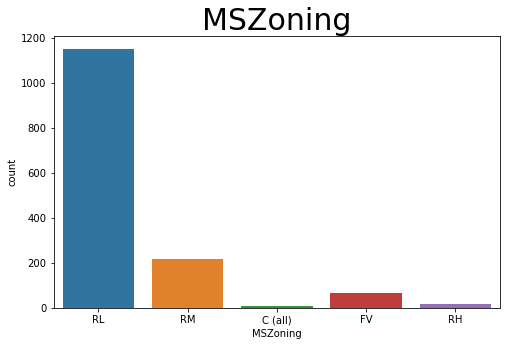

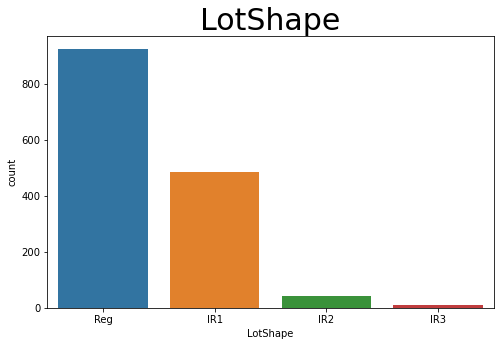

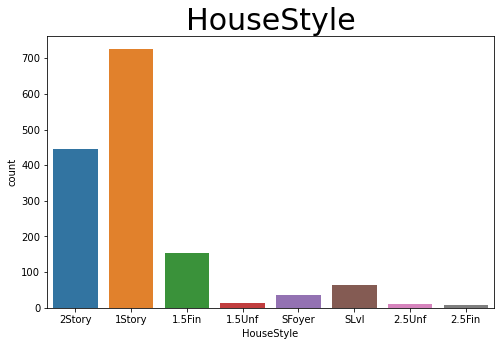

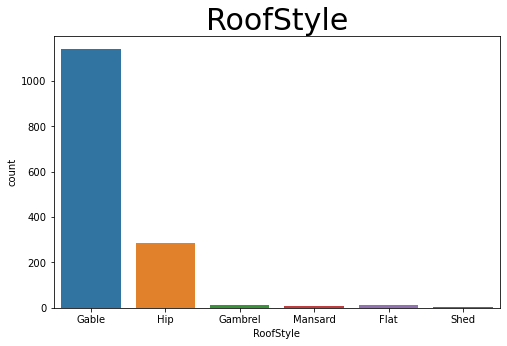

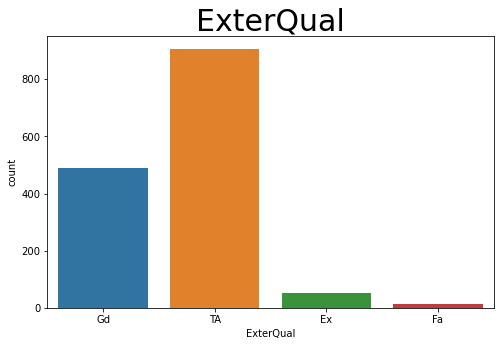

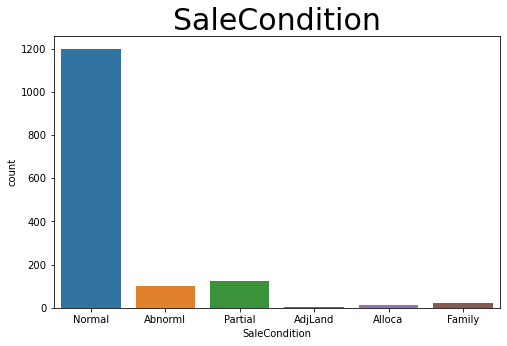

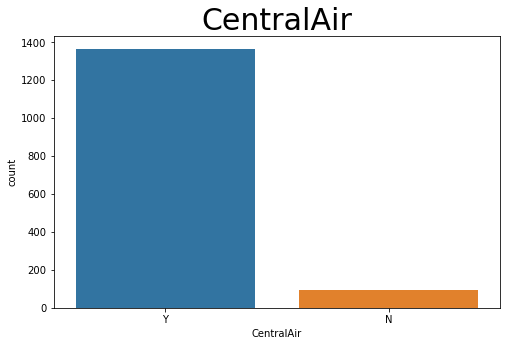

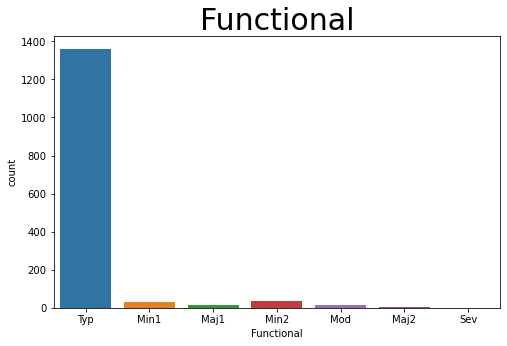

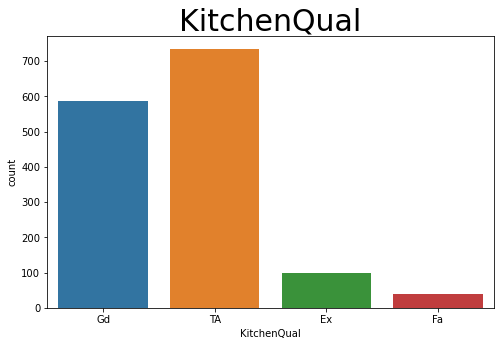

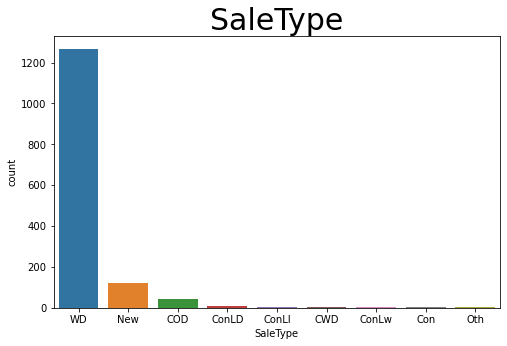

In [51]:
# Plot count plots for 10 Categorical columns:
for i, variable in enumerate(["MSZoning", "LotShape","HouseStyle","RoofStyle","ExterQual","SaleCondition","CentralAir","Functional","KitchenQual","SaleType"]):
    plt.figure(figsize = (8,5))
    sns.countplot(Houses_df[variable])
    plt.title(variable,fontsize=30)
    plt.show()

Findings :
1. MSZoning:
- Most of the houses are classified as RL residential low density.
- Minority Classified as C or commercial.
2. LotShape:
- Mostly all houses are regular and very low count is irregular.
3. HouseStyle:
- Most of the houses are of 1story style comes on second place the 2 story and a minorty of 1.5Unf,2.5Unf and 2.5Fin.
4. Roof Style:
- Most of the houses in Australia seems to have Gablw and Hip roof styles.
5. ExterQual:
- Majority of Autralia houses have average or typical exterior quality followed by Good quality on the sceond place and a minority of fair and excellent. 
6. SaleCondition:
- Most of the houses sold have a sal conditon of normal followed by partial and with the lowest records is Ad joining land purchase.
7. Central Air:
- Almost all houses have central air conditioning with almost less than 10% with no air conditioning.
8. Functional
- Almost 90% of the houses have typical functionalities remaining contions or functions are minority.
9. KitchenQual:
- Most of the houses have kitchens with typical quality follwed by good small number have fair or excelent quality.
10. SaleType:
- Most of the houses were sold warranty deed conventional WD less than 200 houses were sold as new.

## 5. 4.Numerical Variables Univariate Analysis::

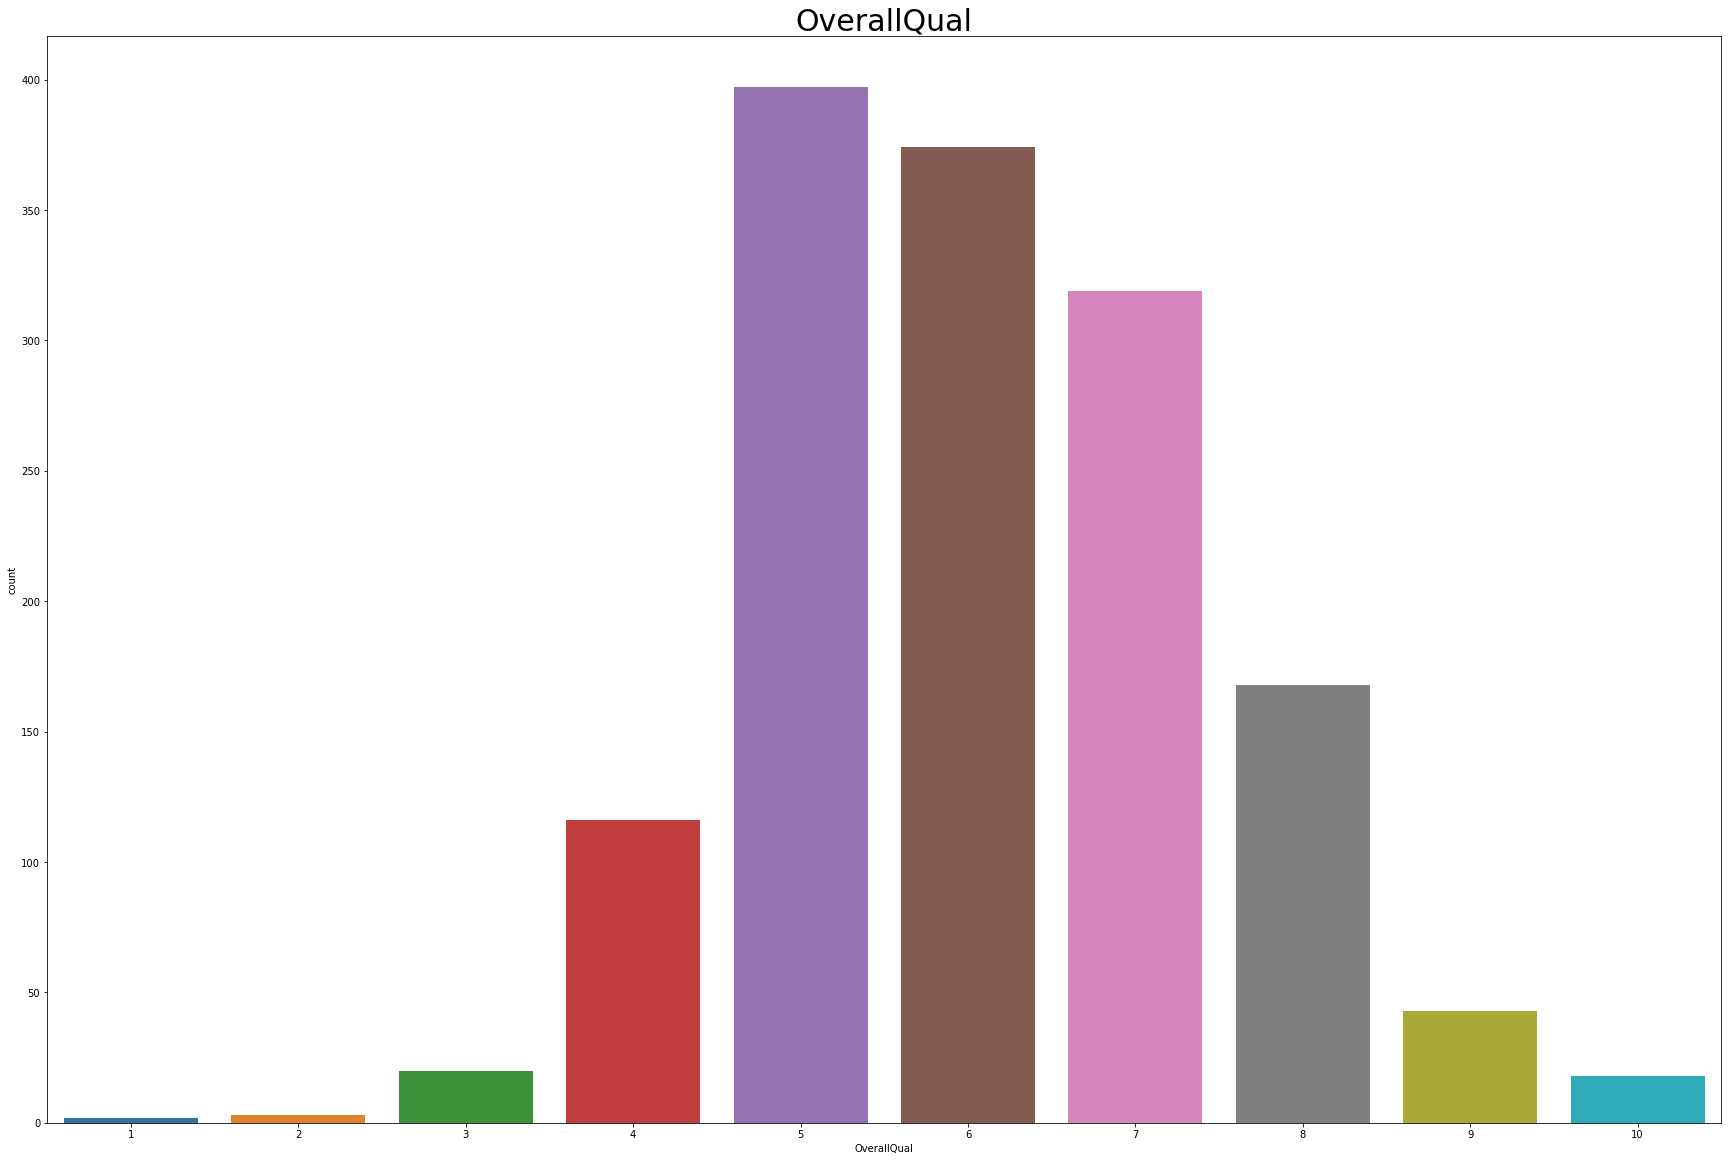

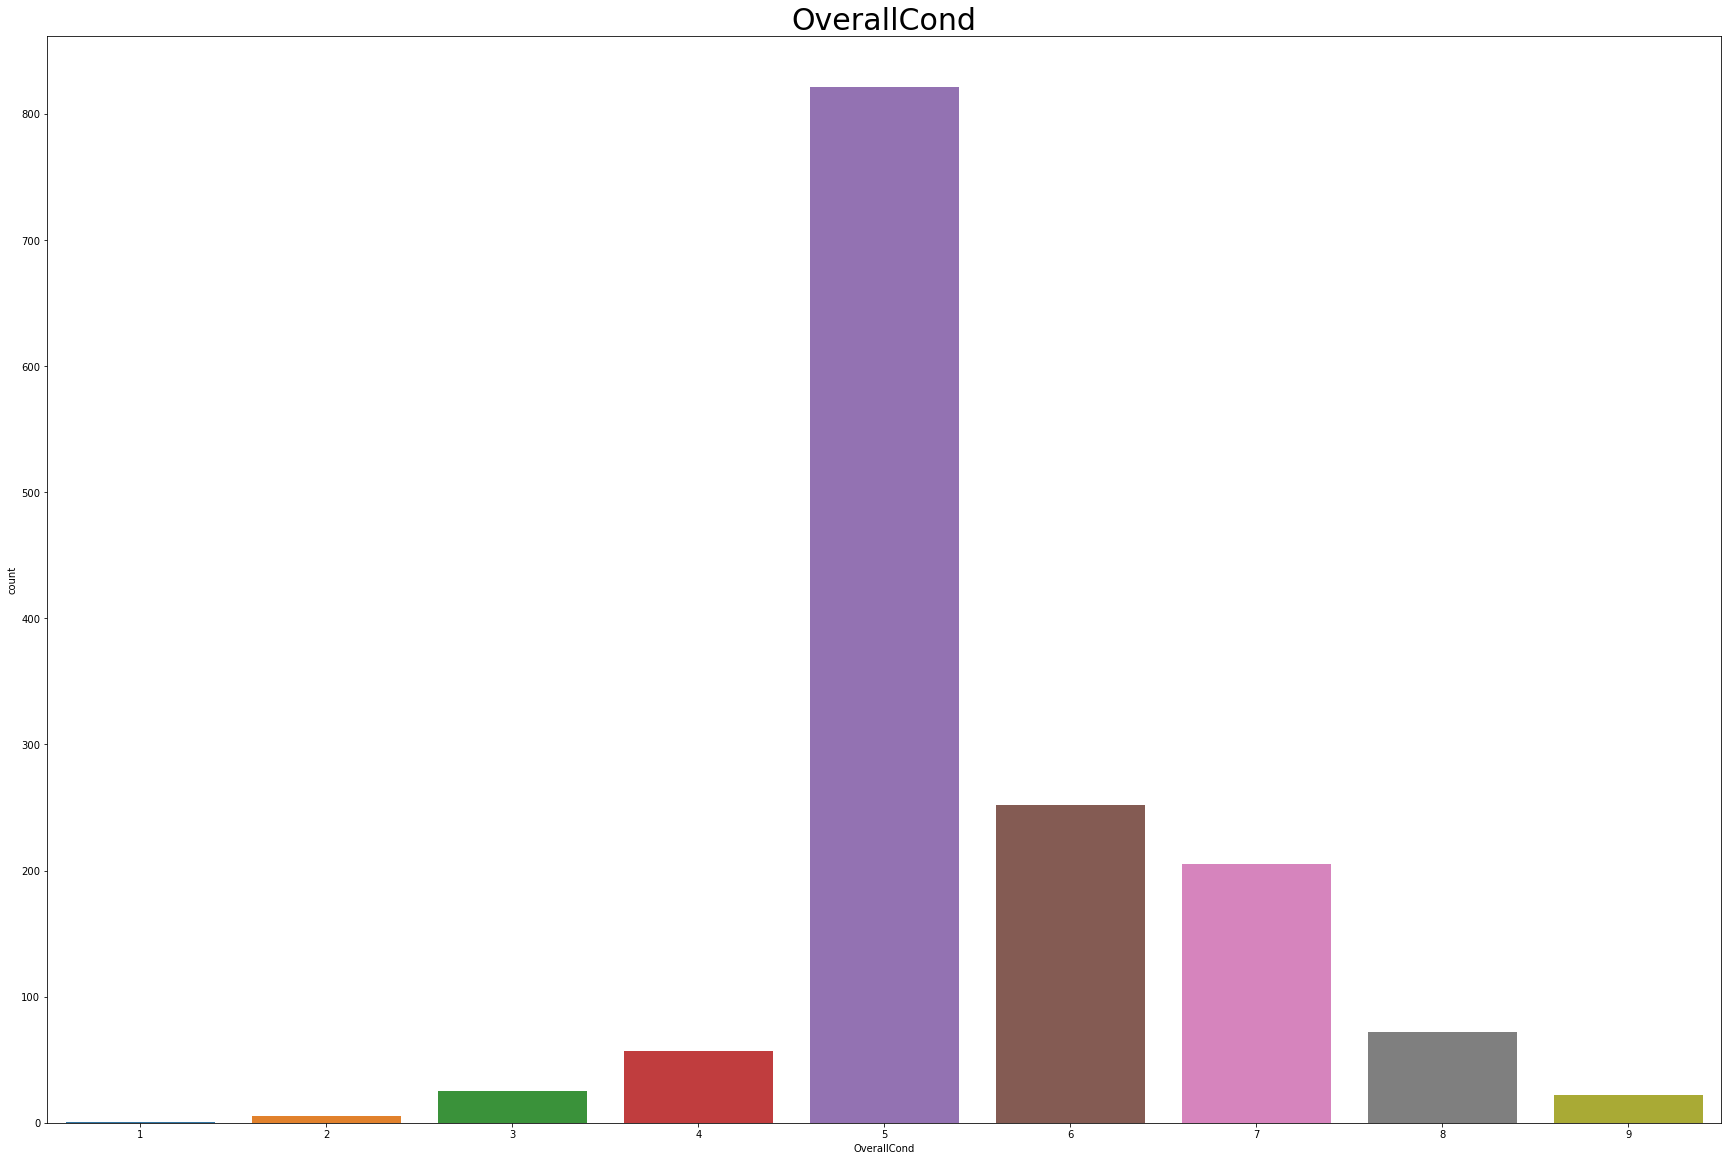

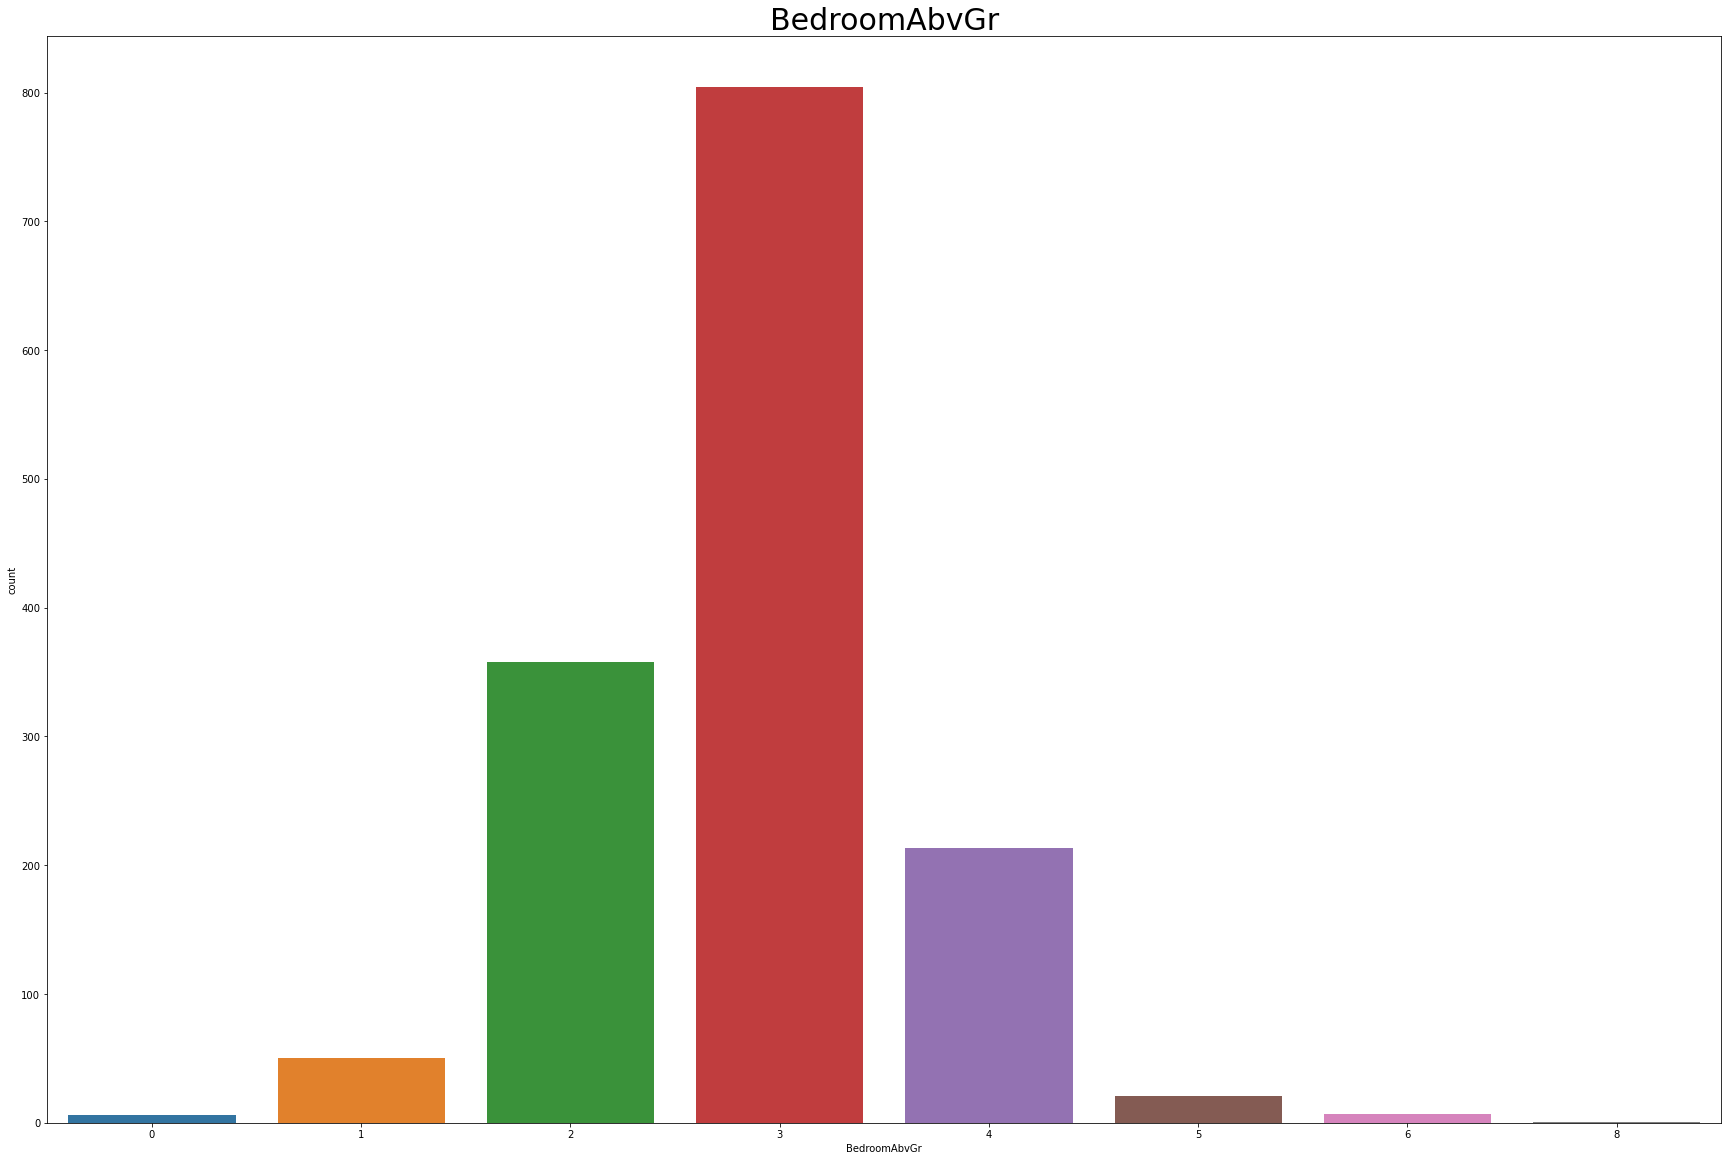

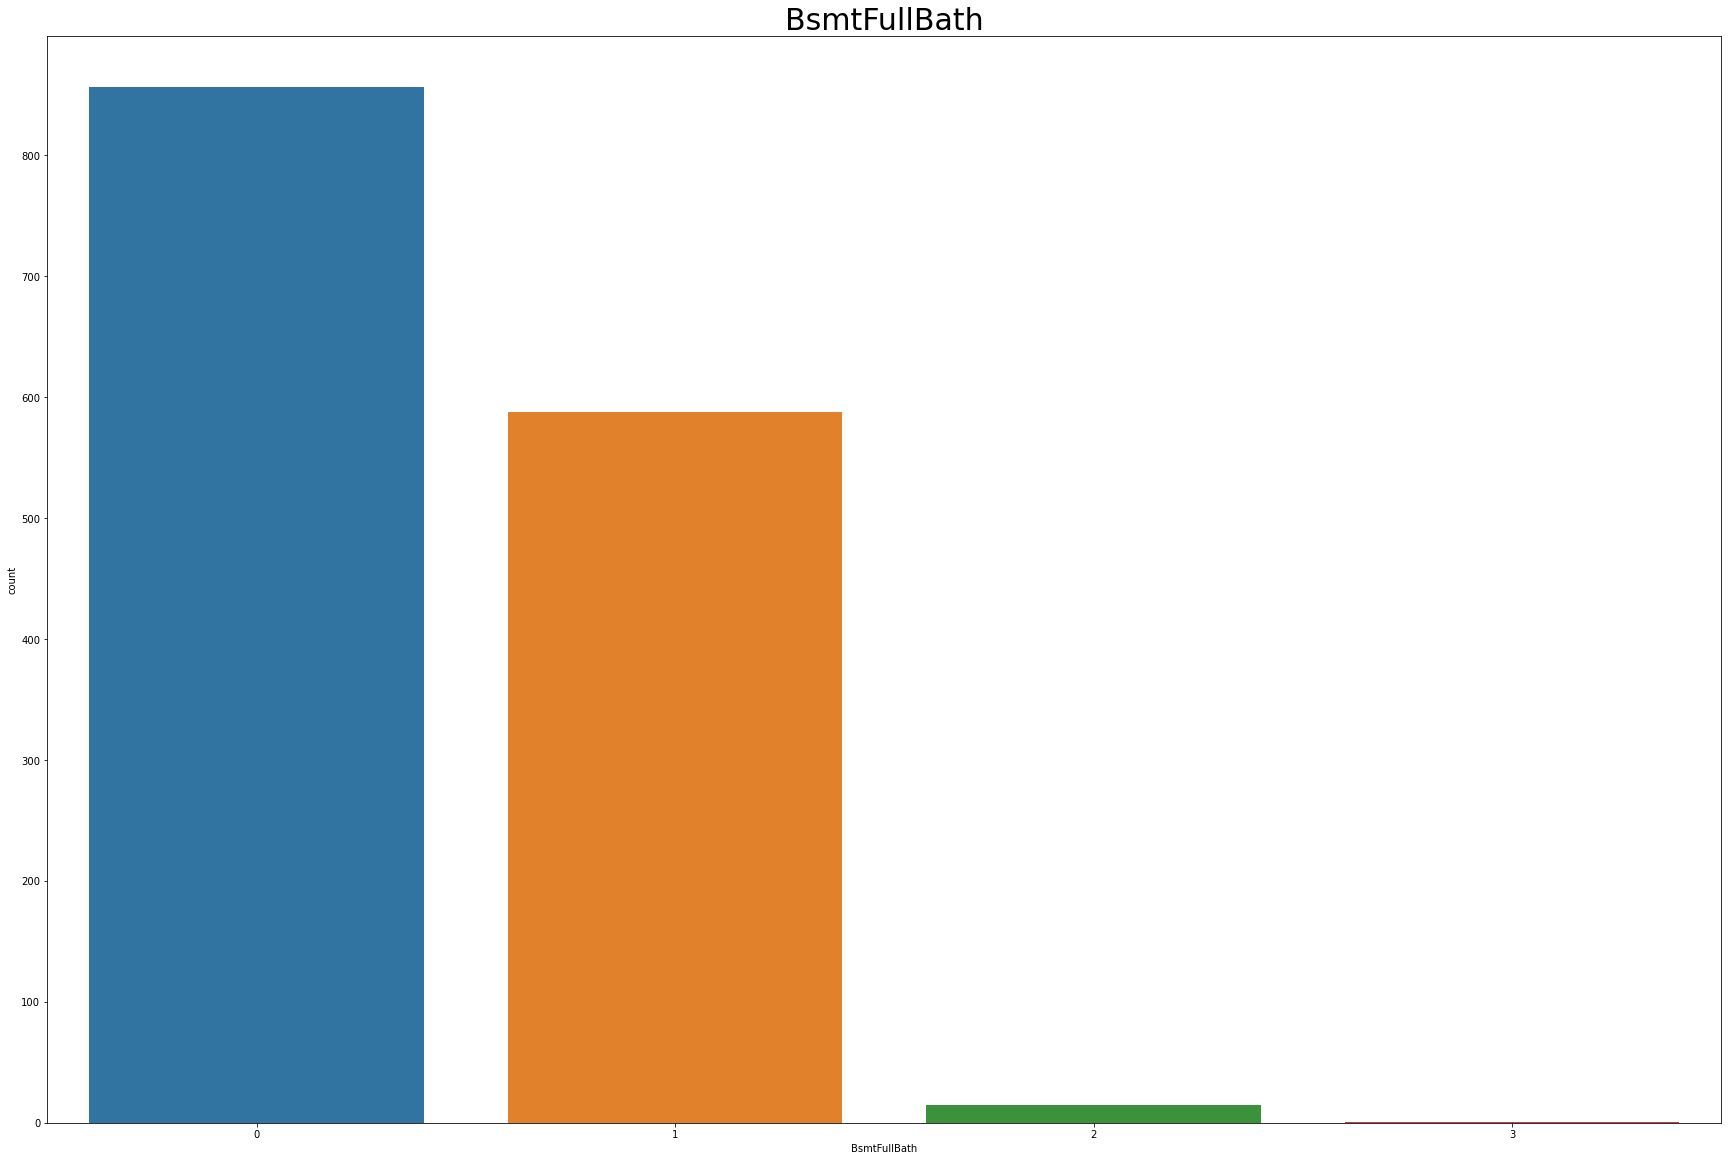

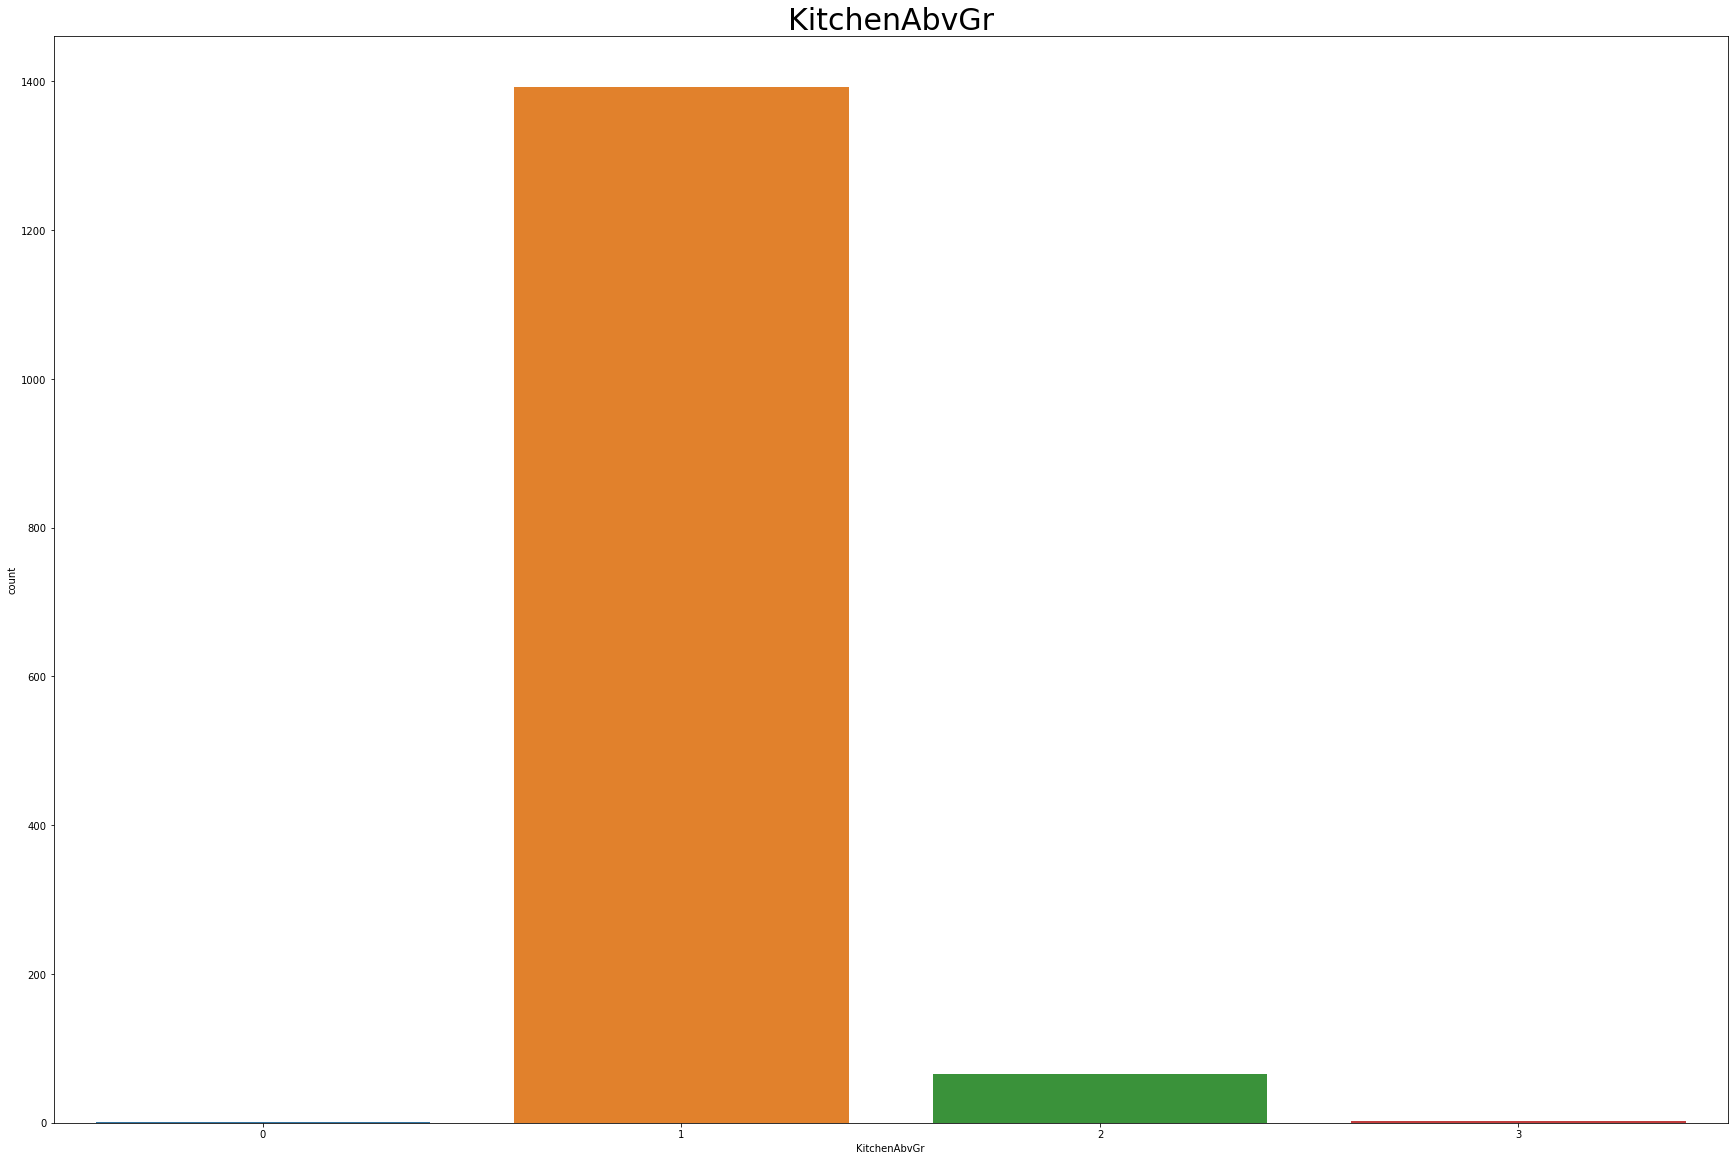

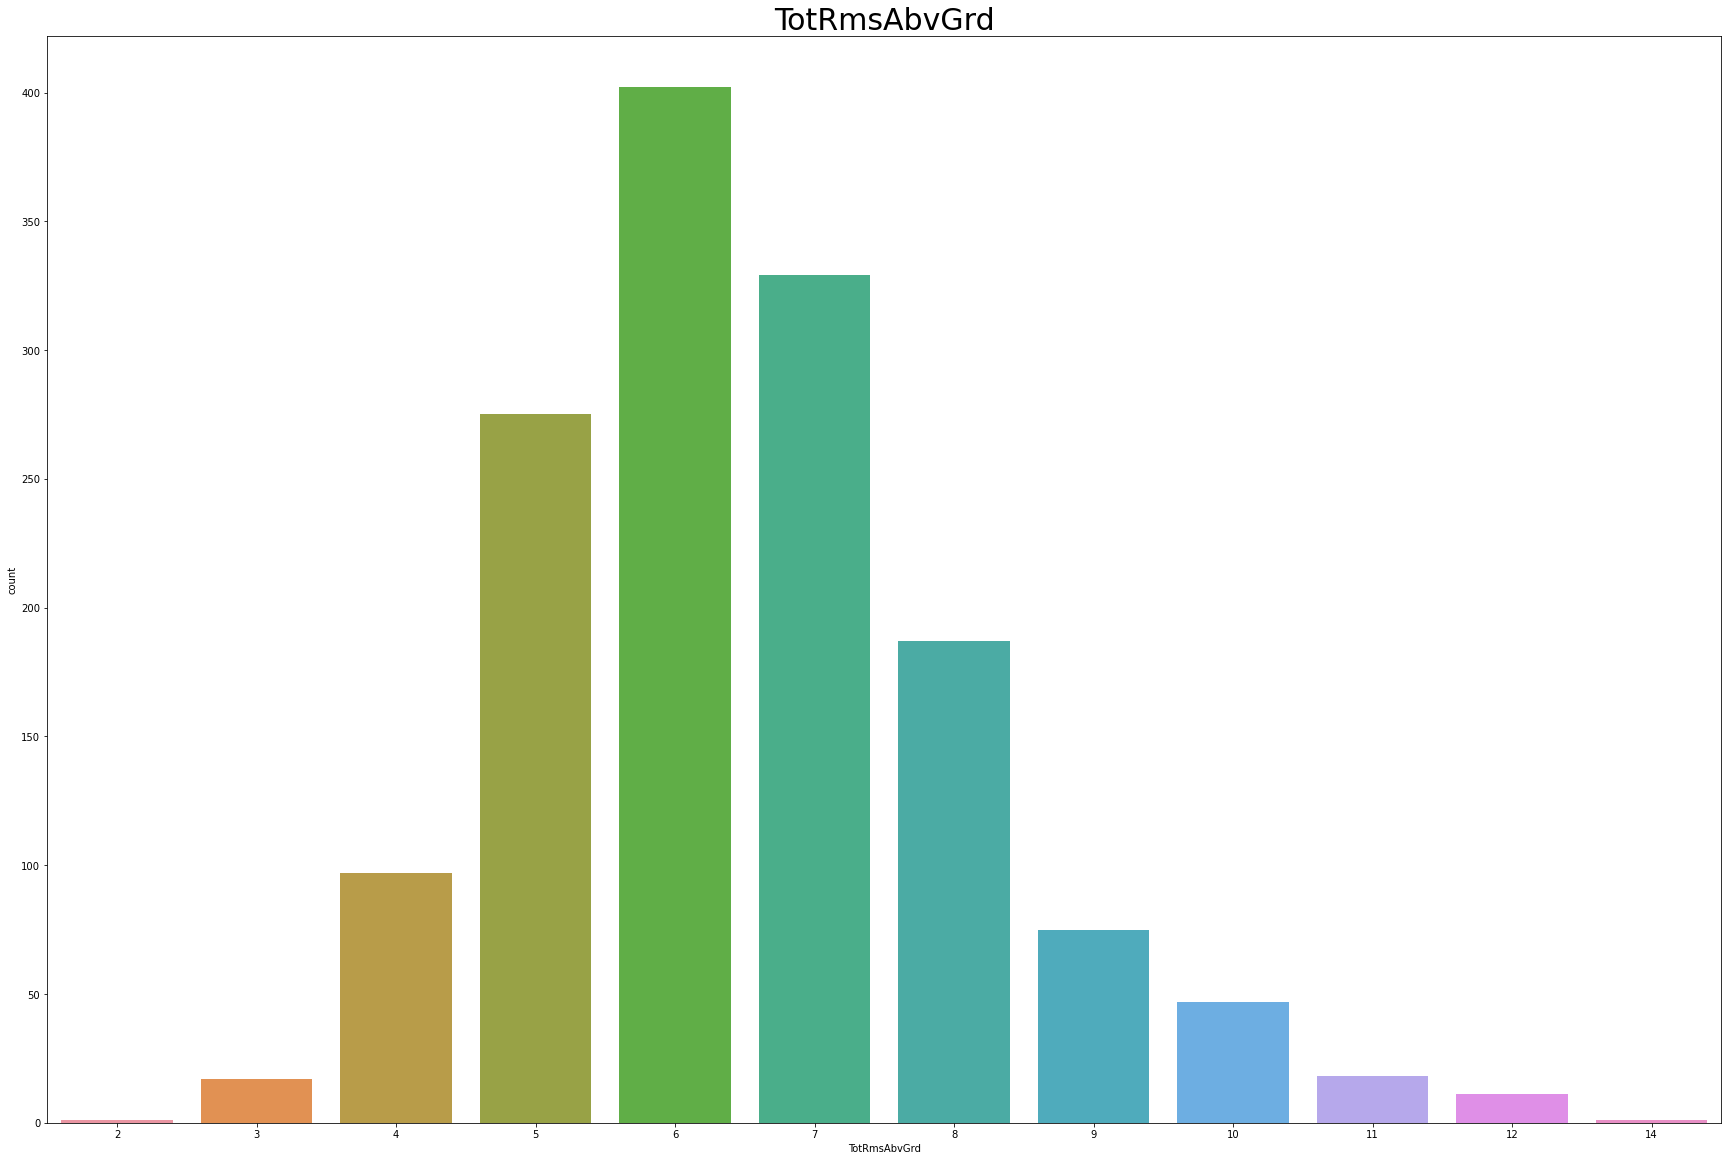

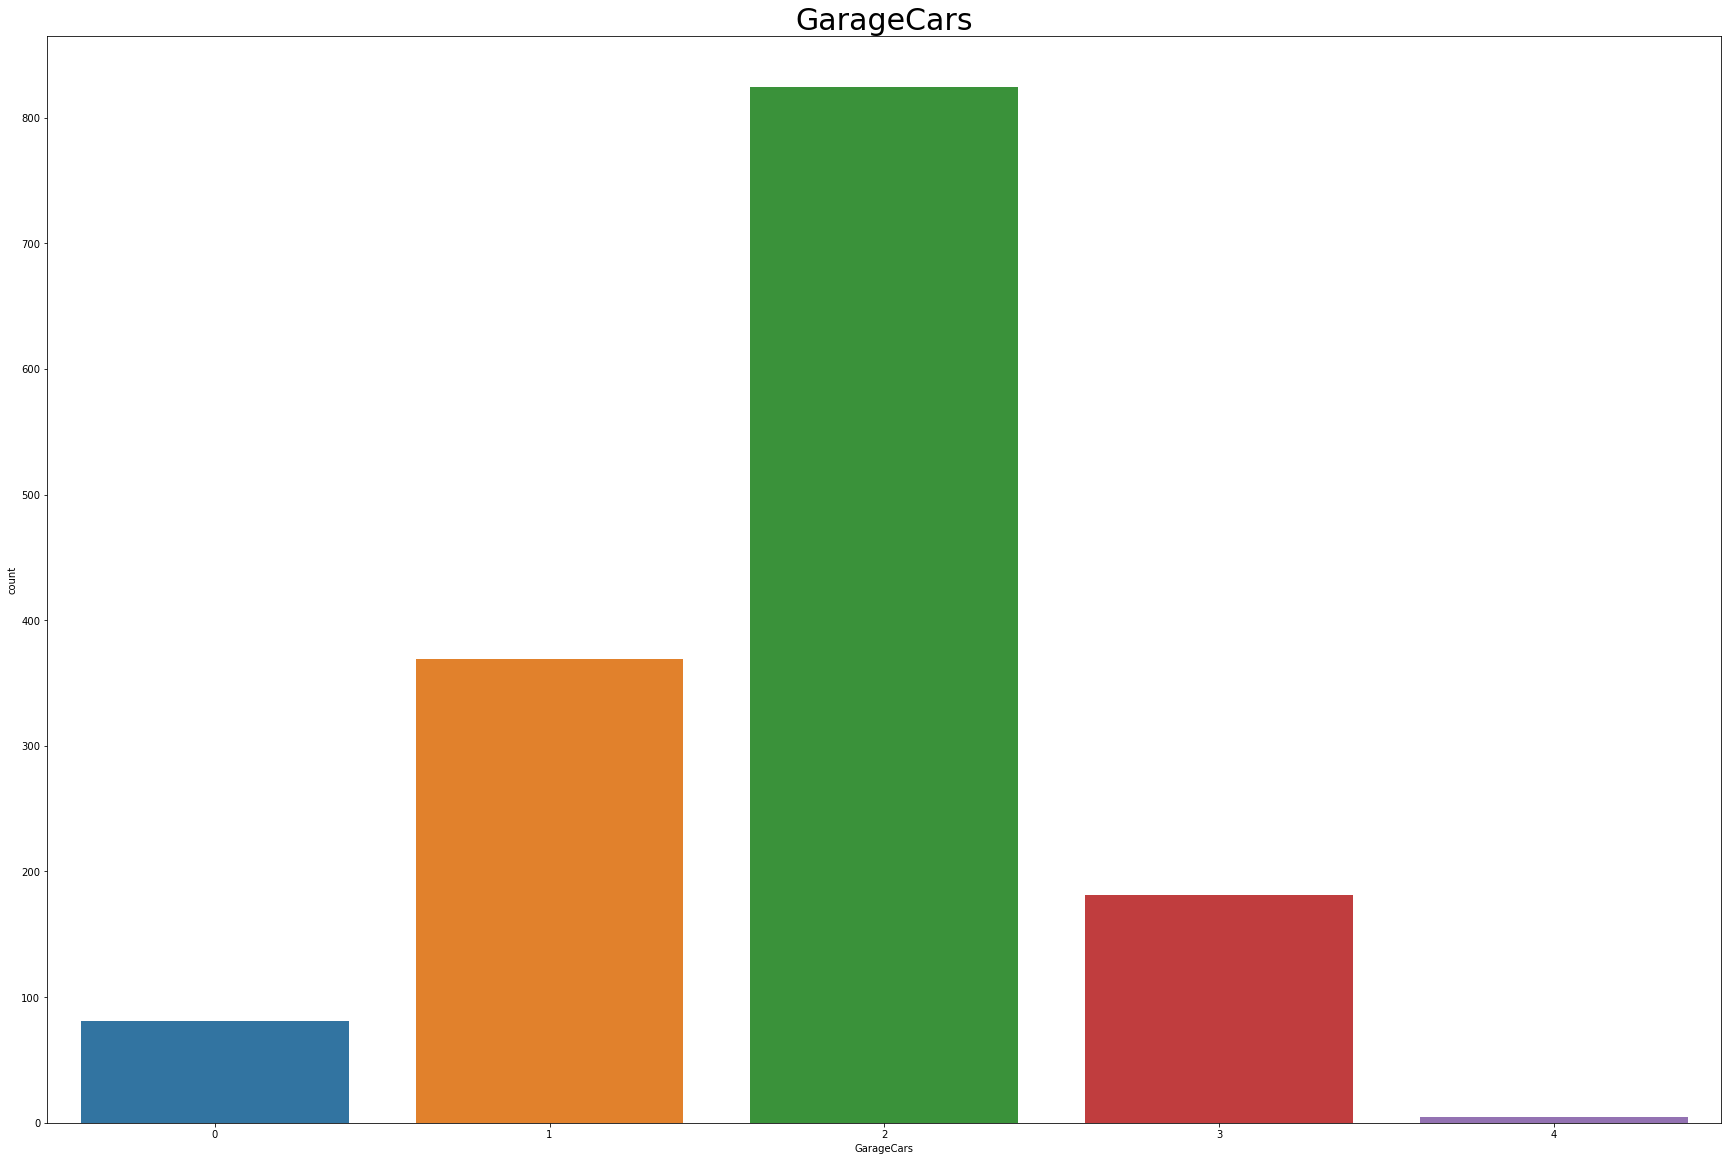

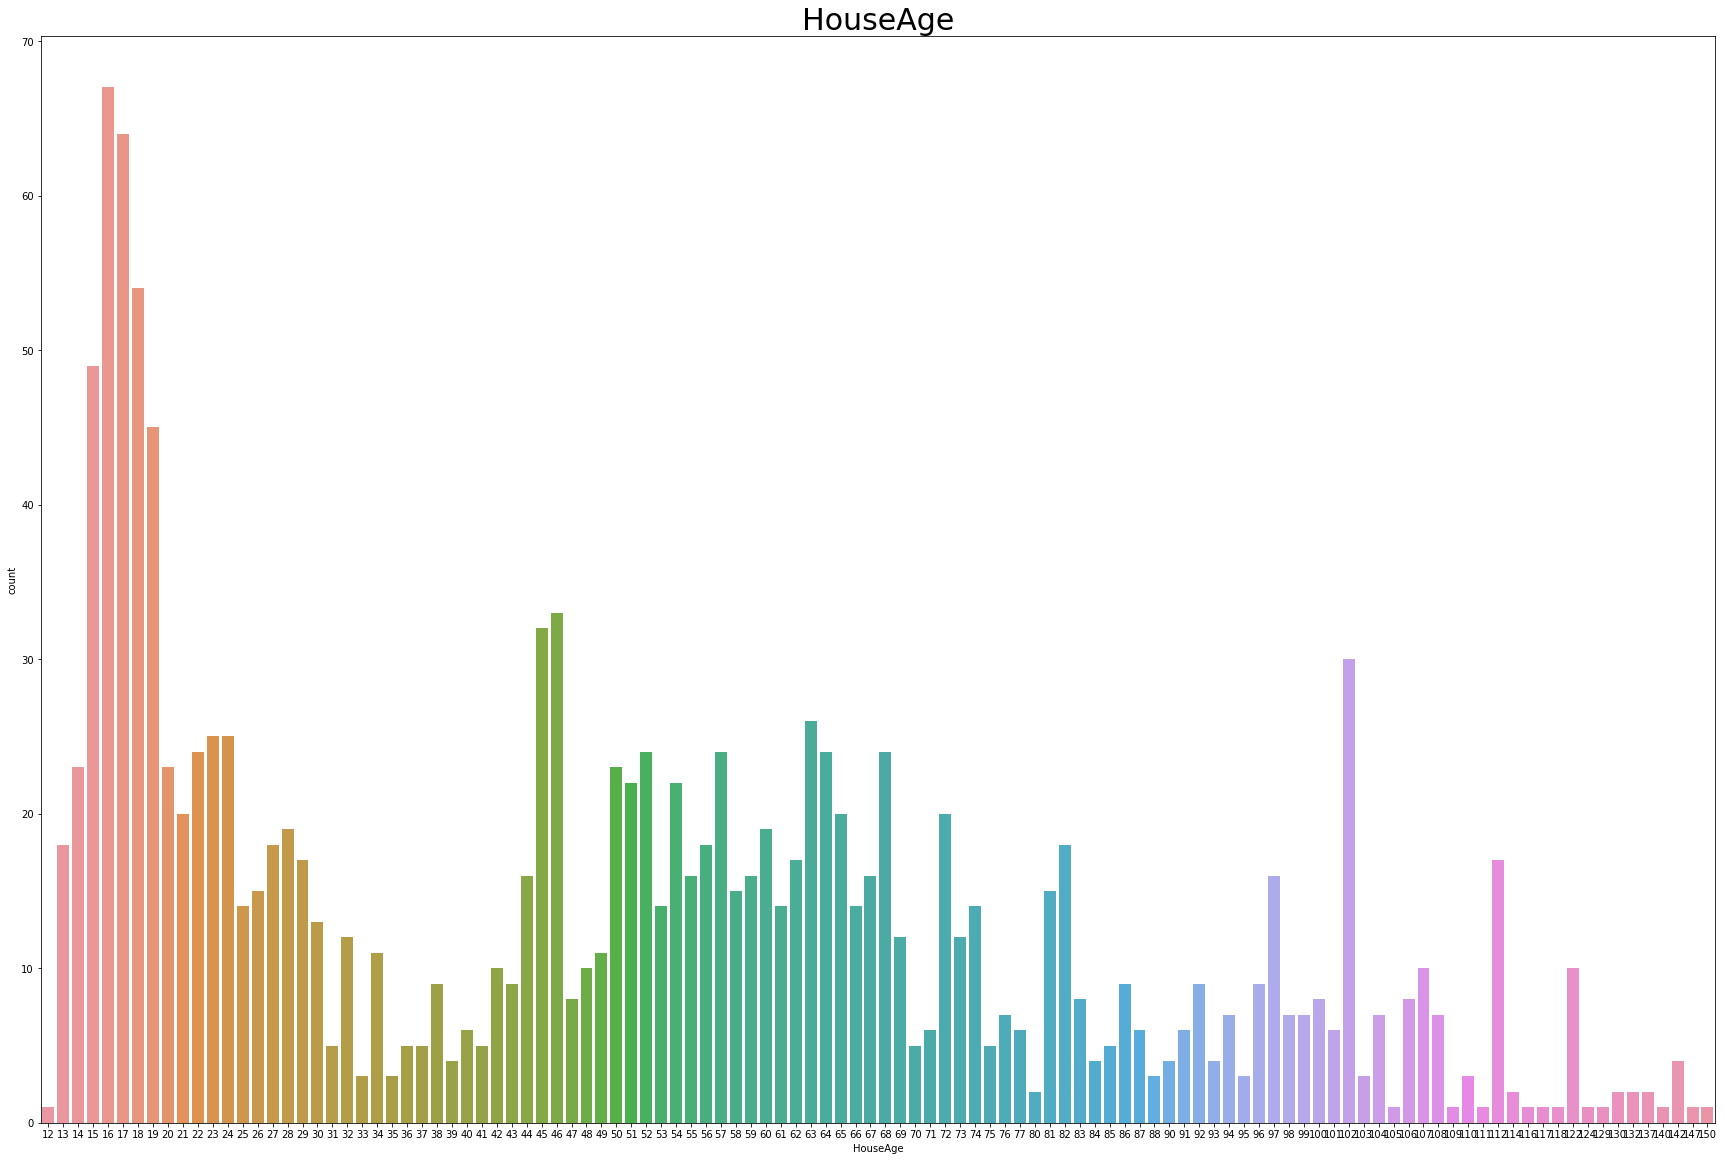

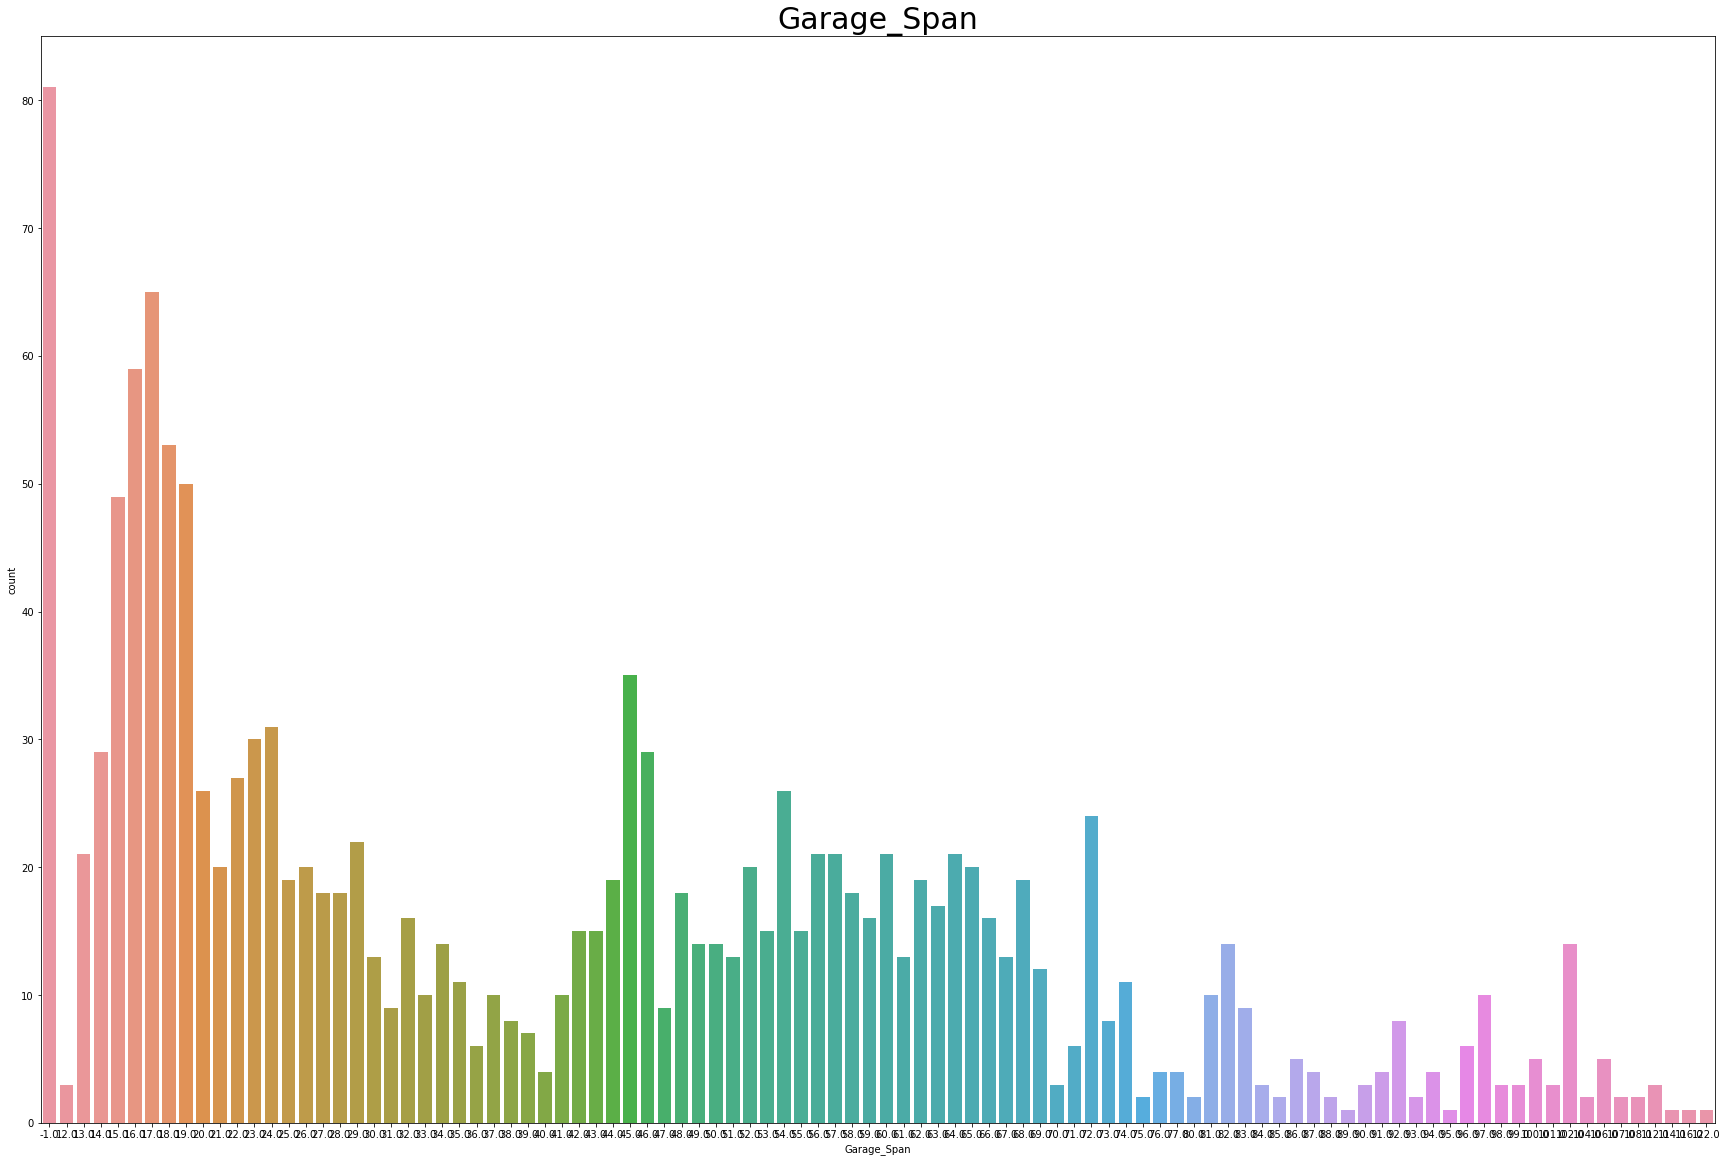

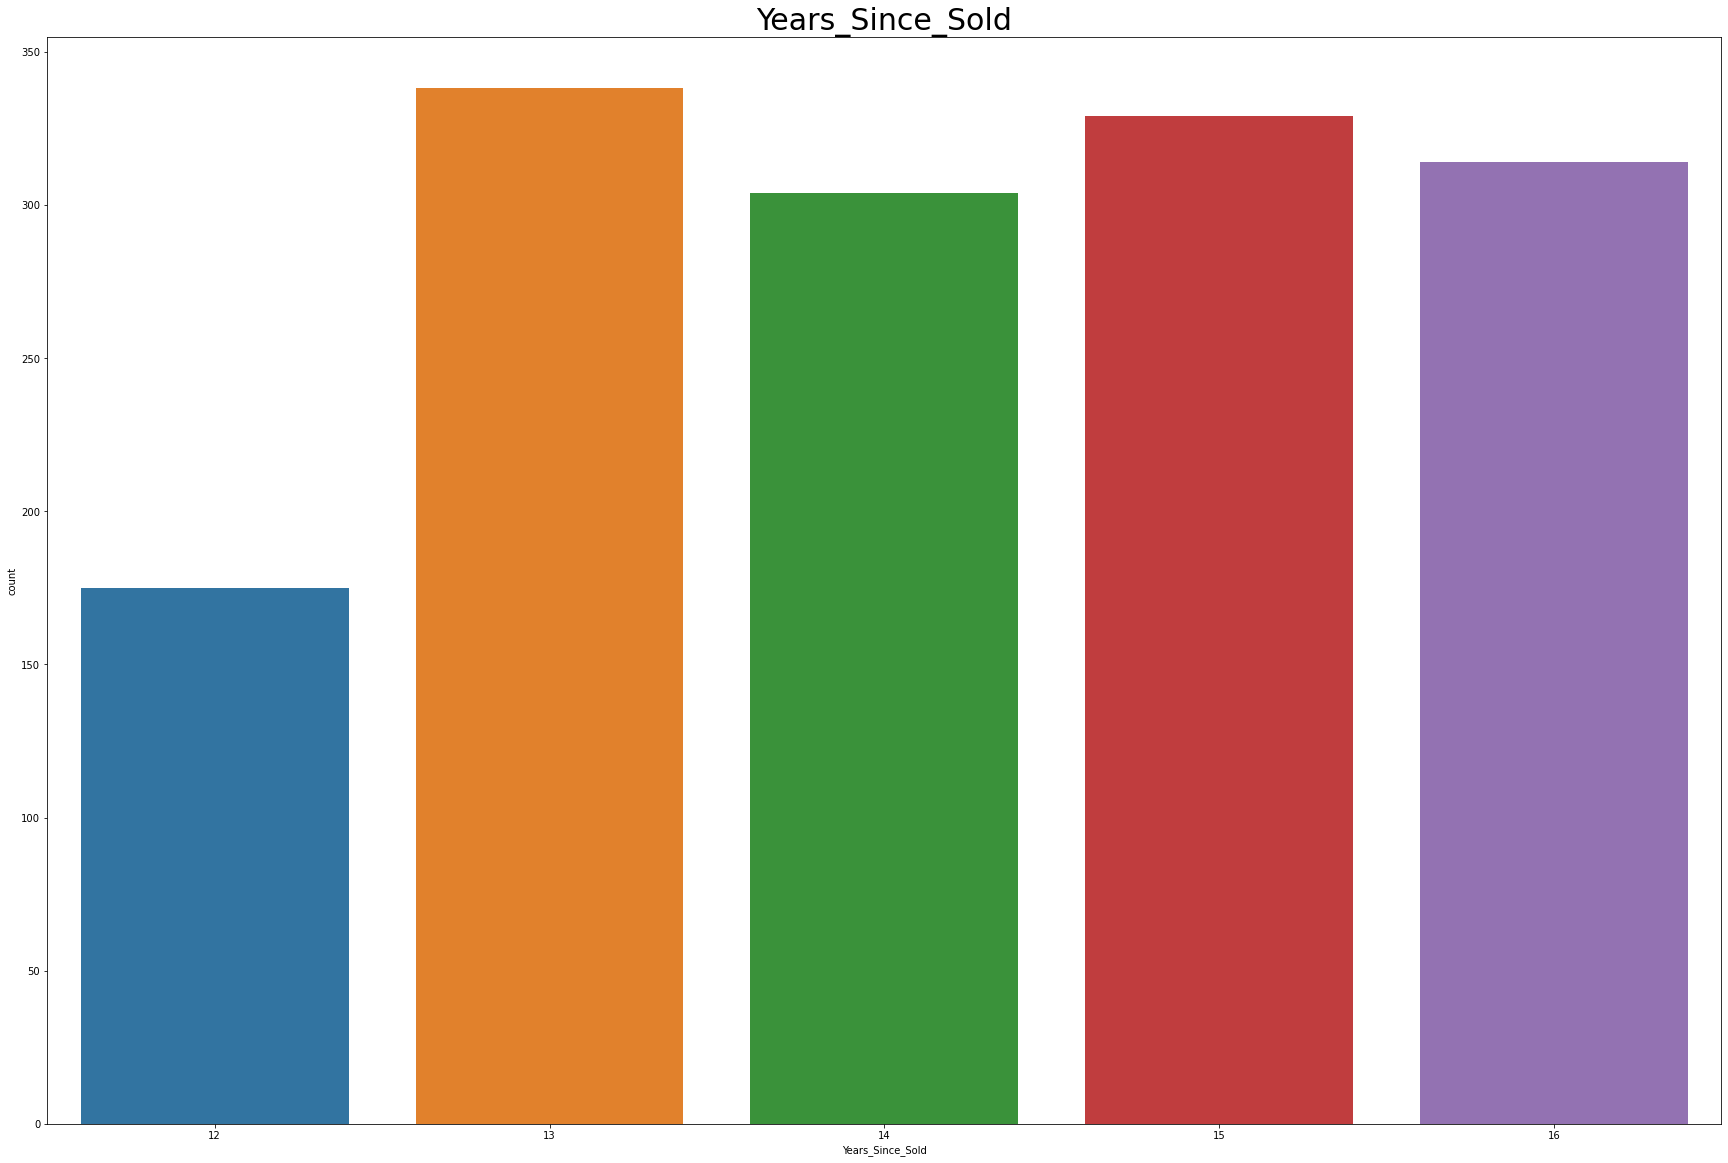

In [52]:
# Plot count plots for 10 numerical columns:
for i, variable in enumerate(["OverallQual", "OverallCond","BedroomAbvGr","BsmtFullBath","KitchenAbvGr","TotRmsAbvGrd","GarageCars","HouseAge","Garage_Span","Years_Since_Sold"]):
    plt.figure(figsize = (30,20))
    sns.countplot(Houses_df[variable])
    plt.title(variable,fontsize=30)
    plt.show()

Findings:
1. OverallQual:
- On a scale of 1-10 90% of the houses are in range of 4-8 with the mode of 5.
2. OverallCond:
- On a scale of 1-9 more than 90% of the houses are in range of 4-8 with the mode of 5 for the overall condition of houses.
3. BedroomAbvGr:
- More than 800 houses have -3- fair bedroom confition very few having beedroom conditions as good or excellent.
4. BsmtFullBath
- Most of the houses have 0 full bathrooms in the basement followed by 1 full bathroom in the basement low number of houses has 3 full bathrooms in the basement.
5. KitchenAbvGr:
- Most of the houses have 1 kitchen above grade and very few have 2 or 3 kitchens above grade.
6. TotRmsAbvGrd:
- Many houses have 5-7 rooms above grade and very few have 11-14 bedrooms above grade.
7. GarageCars:
- Majority of houses has car garages that can occupy 2 cars low number of houses can occupy 4 cars.
8. HouseAge:
- High portion of houses in Australia for sale has are 13 to 17 years old.
9. Garage_Span:
- Many houses in Australia for sale that has garages age between 11 to 22 years.
- There are very few garages which are old thus, there are higher chances that the condition of them are good or average.
10. Year_Since_Sold:
- The majority of houses turnover is 11 to 14 years.

#### 5.5 Bivariate Analysis for Continous - Categ Variables:

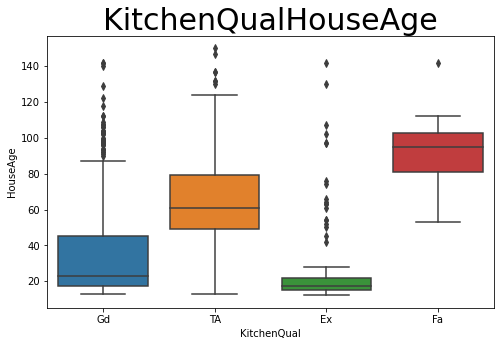

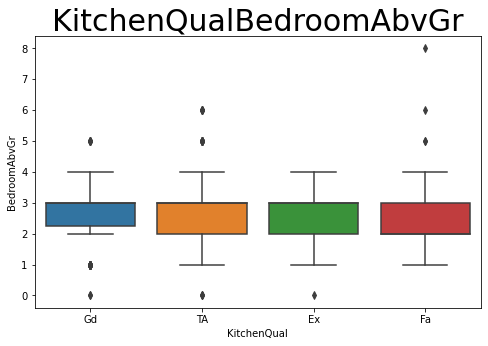

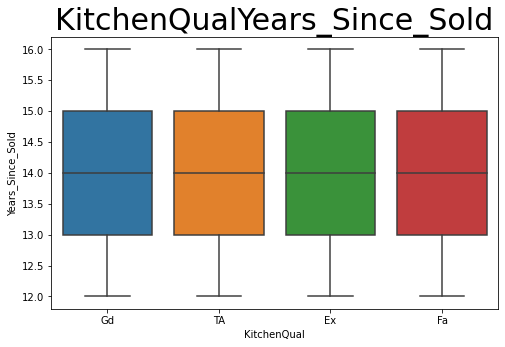

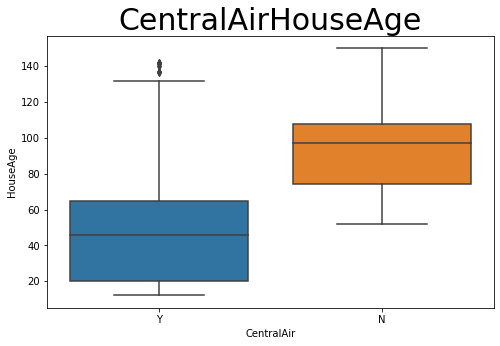

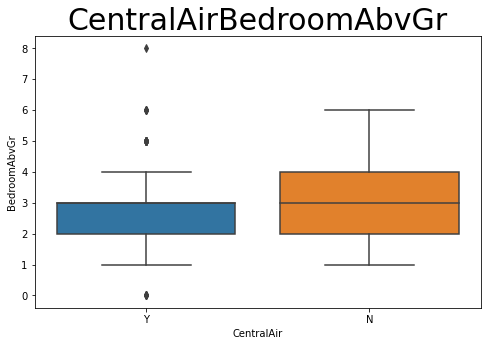

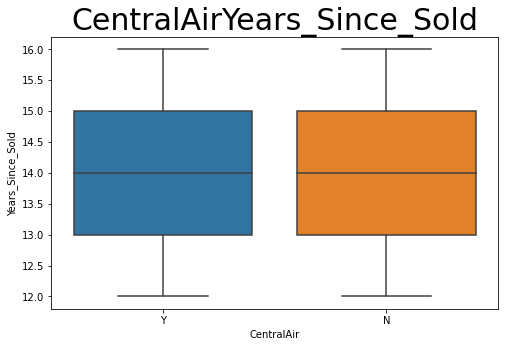

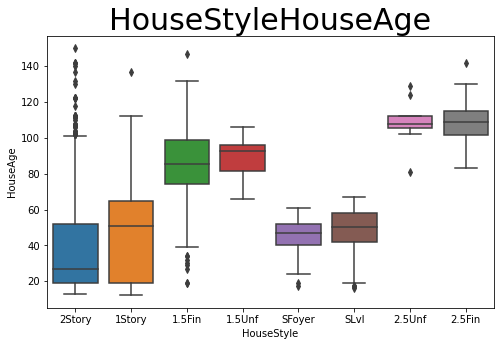

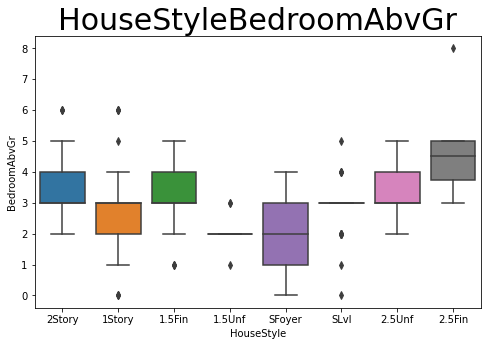

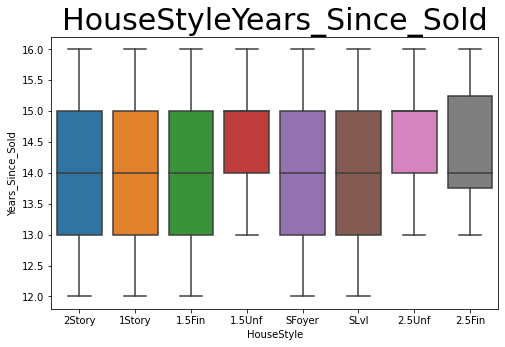

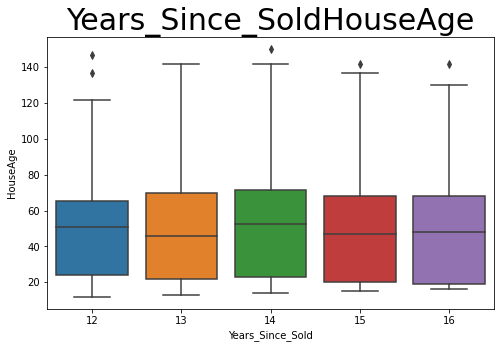

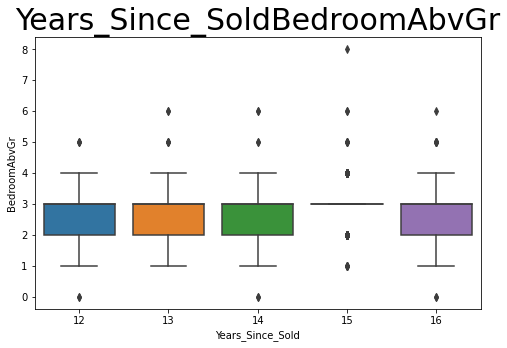

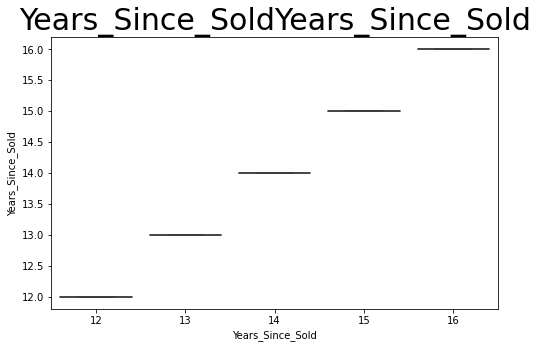

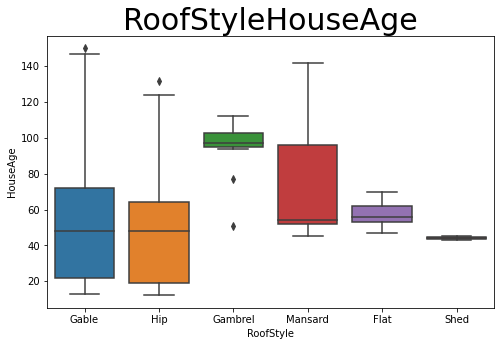

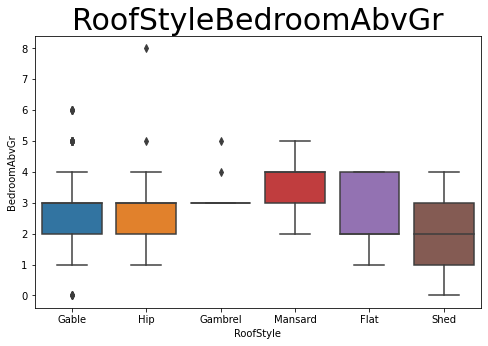

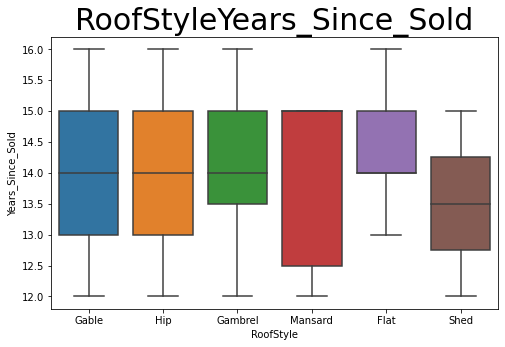

In [53]:
for i, variable in enumerate(["KitchenQual", "CentralAir","HouseStyle","Years_Since_Sold","RoofStyle"]):
    for j, var in enumerate(["HouseAge","BedroomAbvGr","Years_Since_Sold"]):
        fig=plt.subplots(figsize=(8,5))
        sns.boxplot(x=variable, y=var, data= Houses_df)
        plt.xlabel(variable)
        plt.ylabel(var)
        plt.title(variable+var,fontsize=30)
        plt.show()

Findings :
1. Kitchen Quality and House Age:
- Houses with kitchen Quality rating as Good and Excellent has is 20 to 40 years old older houses has Fair rating
- However the kitchen quality is the years since sold is approximately equal.
2. RoomAbvGrd
- Majority of the houses which dont have central air conditioner has bedroom above grade while some have both central air con. and are above grade.
3. HouseStyle vs ...:
- Houses having house styles as 2Story and 1Story has are newer and ages between 20 to 40 probably they are in good condition.
- Houses having house style as 1.5Fin and 1.5Unf are 70 to 100 years old probably those houses have average or fair condition.
- Houses having house style as SFoyer and SLvl are 40 to 60 years old probably those houses have average or good condition.
- Houses having house style as 2.5Unf and 2.4Fin are 100 to 120 years old more than a century had passed there might be chances that those houses have fair condition as thye might be turned into toursitc sites or acient historical sites.
4. HouseAge Vs...:
- Houses with roof style Gablr and Hip was mostly sold 13-15 years ago.
- Houses with roof style Mansard mostly sold 12 to 15 years ago.

#### 5.6. Bivariate Analysis Categ variables:

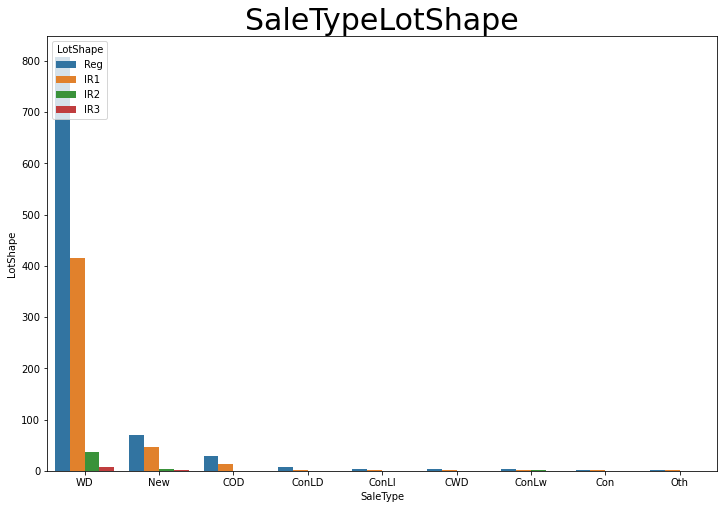

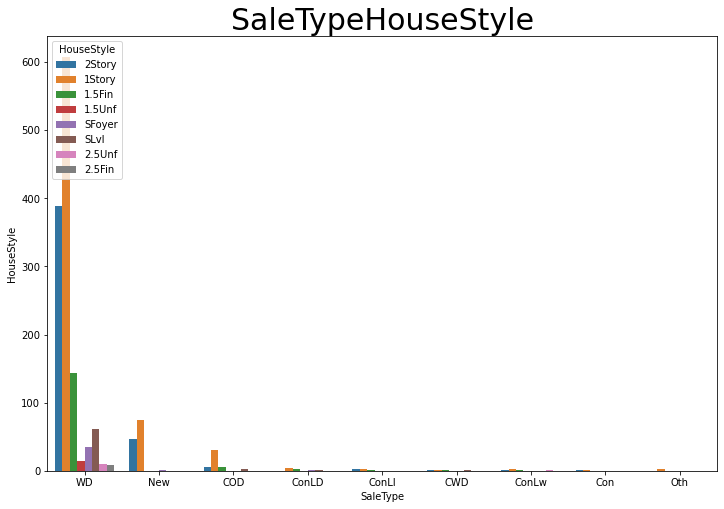

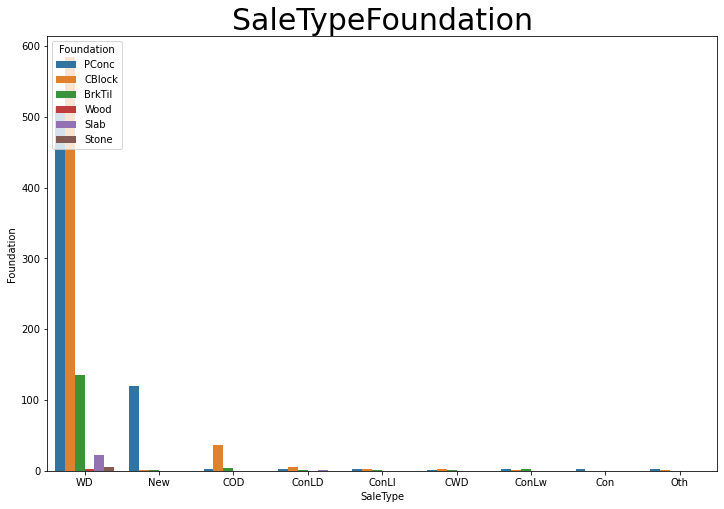

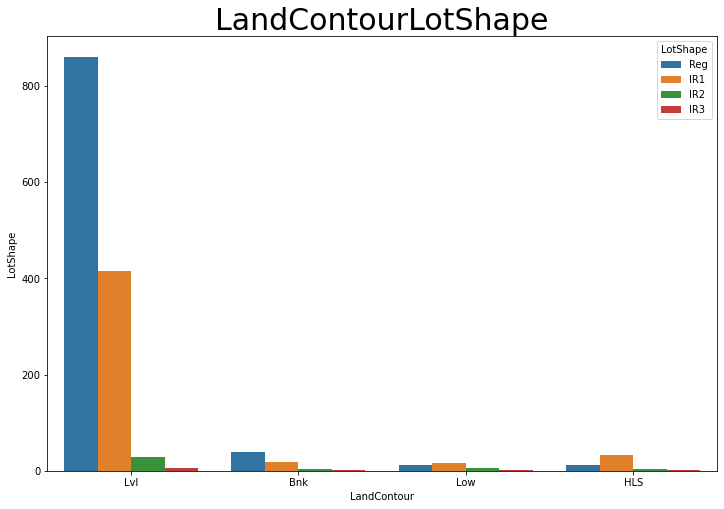

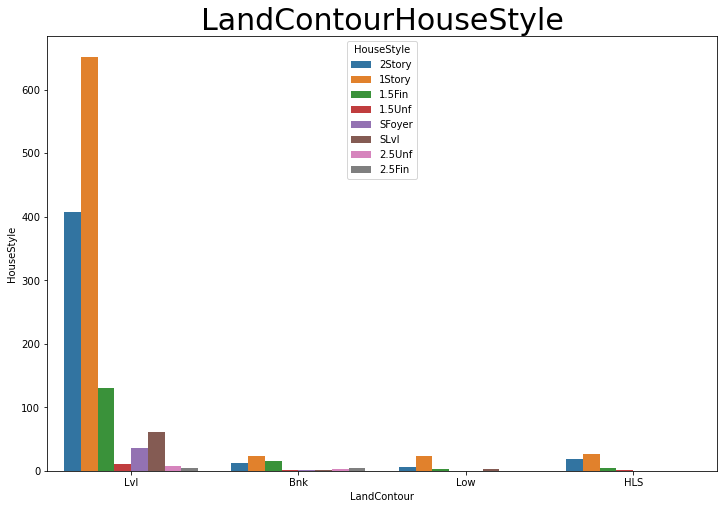

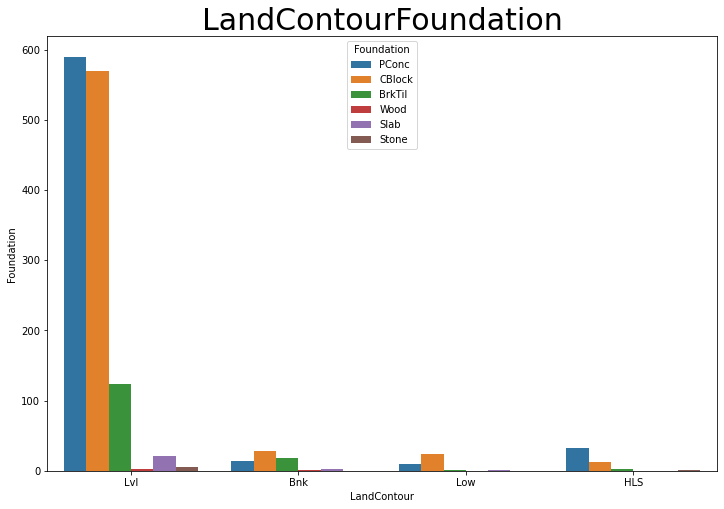

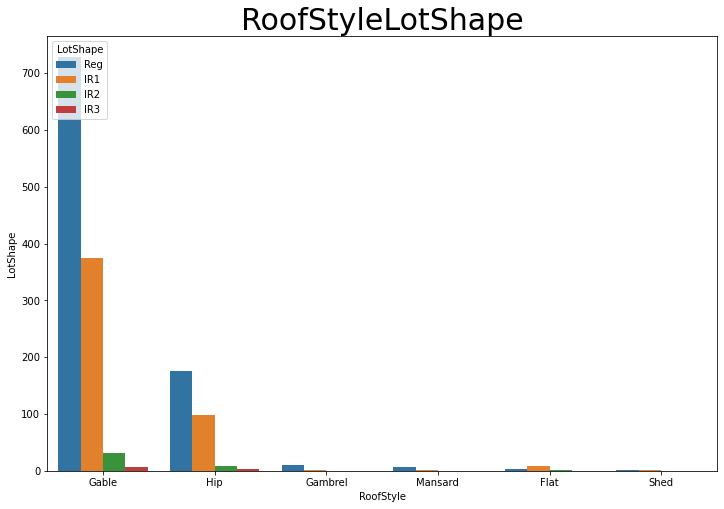

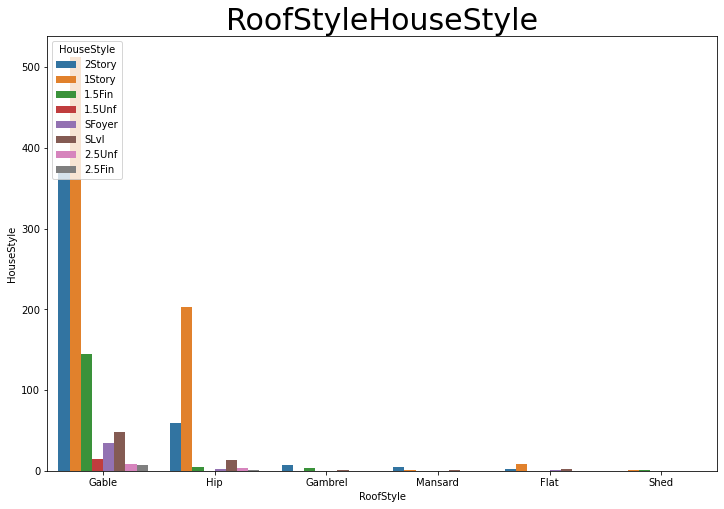

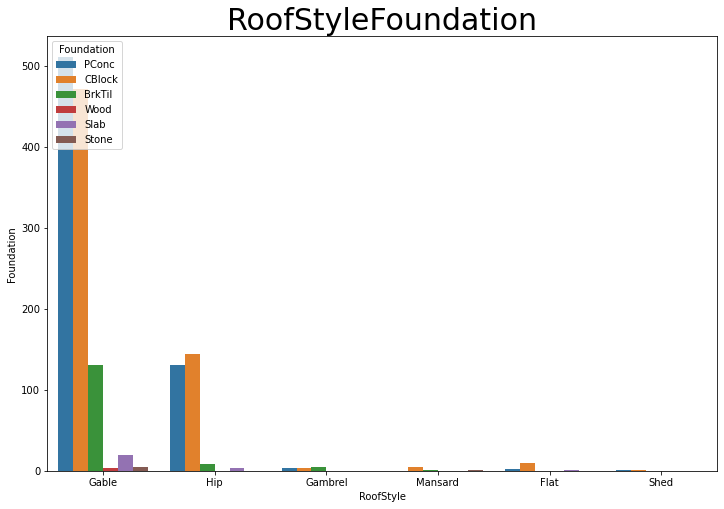

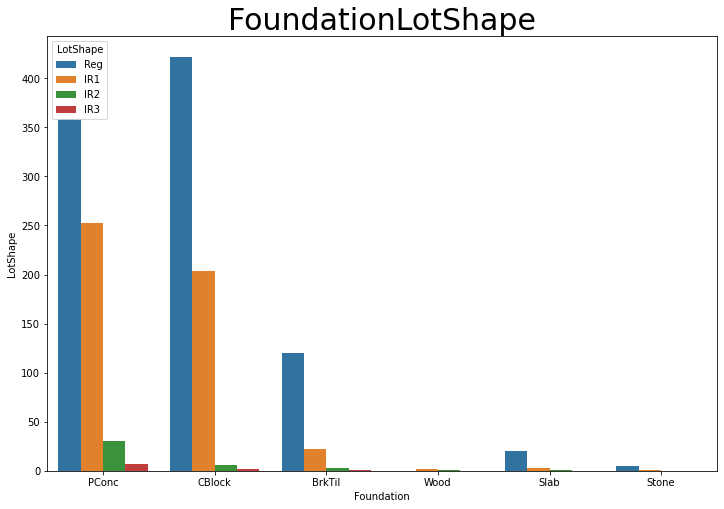

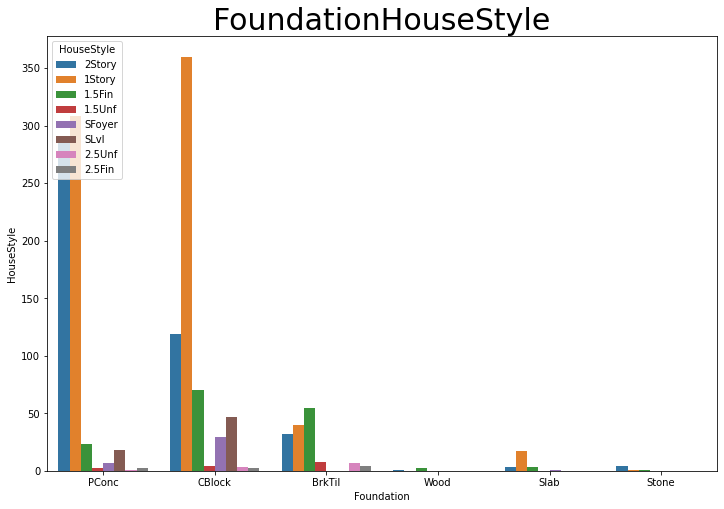

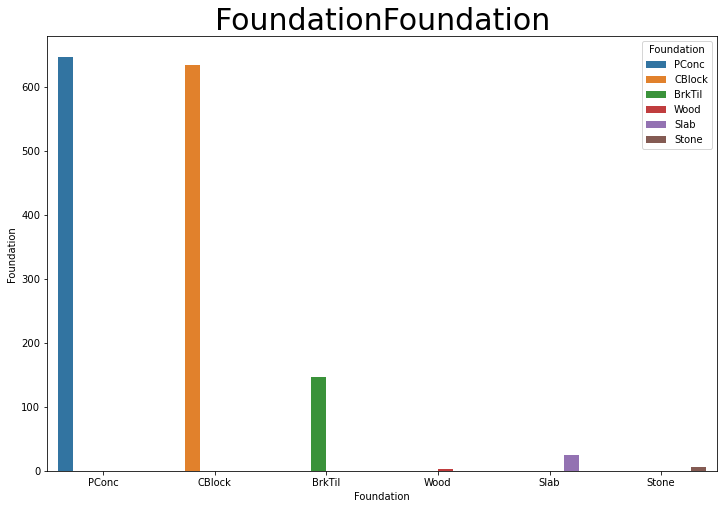

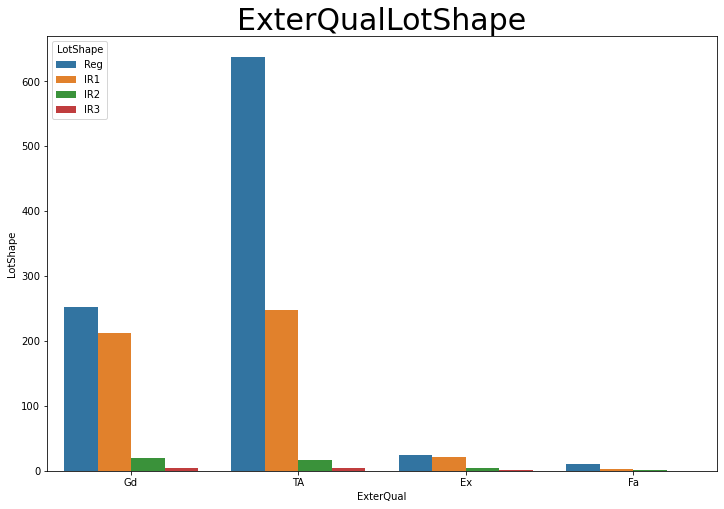

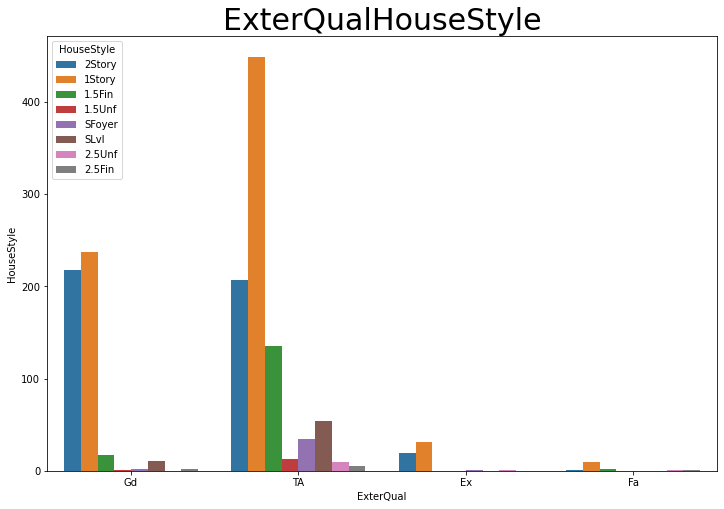

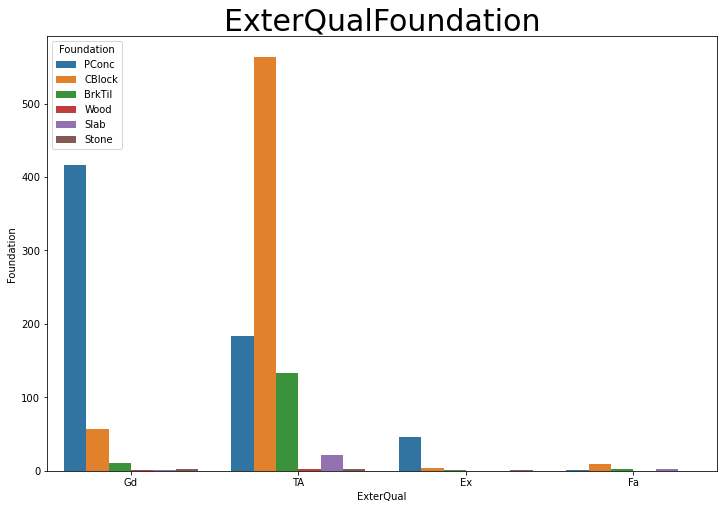

In [54]:
# Plot count plots for 10 Categorical columns:
for i, variable in enumerate(["SaleType", "LandContour","RoofStyle","Foundation","ExterQual"]):
    for j, var in enumerate(["LotShape","HouseStyle","Foundation"]):
        plt.figure(figsize = (12,8))
        sns.countplot(x=variable,hue=var,data=Houses_df)
        plt.xlabel(variable)
        plt.ylabel(var)
        plt.xticks(rotation = 0)
        plt.title(variable+var,fontsize=30)
        plt.show()

Findings :
1. LotShape Sale Type:
- Majority of Houses which on sale have Sale type as WD and shape of property "REG" followed by "IR1".
2. LandCotour vs HouseStyle:
- Houses available for sale has property flatness of as "Lvl"(Near Flat) and some properties as "Reg" followed by "IR1".
3. RoofStyle vs. HouseStyle
- Most Houses on sale has roof style as Gable and House style as 1Story followed by 2Story.
4. Foundation Vs. HouseStyle
- Most Houses on sale has foundation as PConc and CBlock and House style as 1Story followed by 2Story.
5. ExtQual vs Foundation:
- Most of the houses has External Quality as "GD" and "TA" where this houses has foundation as PConc and CBlock. 

### 5.7. Correlation of Variables:

In [55]:
# Correlation Matrix
corr = Houses_df.corr()
corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,SalePrice,HouseAge,Garage_Span,Remodeled_HLifetime,Years_Since_Sold
MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.023573,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.013585,-0.073959,-0.027850,-0.107171,-0.040581,0.021407
LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.178469,0.214367,0.042463,0.124098,0.363472,0.413773,0.072388,0.368007,0.090343,-0.006979,0.180534,0.047222,0.236840,-0.004905,0.320518,0.233221,0.269539,0.323511,0.075542,0.137014,0.010287,0.010451,0.335292,-0.116685,-0.021757,-0.083348,-0.006380
LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,0.154871,0.180403,0.171698,0.084774,-0.018340,0.001205,0.257320,-0.014228,0.051767,-0.013788,0.014261
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.407252,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.600671,0.562022,0.238923,0.308819,-0.113937,0.070815,0.817185,-0.572323,-0.374422,-0.550684,0.027347
OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.125694,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,-0.003511,-0.036868,0.375983,0.285602,-0.073741,-0.043950
MasVnrArea,0.023573,0.178469,0.103321,0.407252,-0.125694,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.361945,0.370884,0.159991,0.122528,-0.109907,-0.006723,0.426776,-0.311600,-0.179754,-0.176529,0.008317
BsmtFinSF1,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.224054,0.296970,0.204306,0.111761,-0.102303,-0.015727,0.372023,-0.249503,-0.096151,-0.128451,-0.014359
BsmtFinSF2,-0.065649,0.042463,0.111170,-0.059119,0.040229,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.015211,0.004832,0.049107,0.095726,0.067759,-0.031706
BsmtUnfSF,-0.140759,0.124098,-0.002618,0.308159,-0.136841,0.113862,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.240257,-0.422900,-0.095804,0.288886,-0.041118,0.166643,0.030086,0.250647,0.051575,0.214175,0.183303,-0.005316,0.129005,-0.002538,0.034888,0.221985,-0.149040,-0.158427,-0.181133,0.041258
TotalBsmtSF,-0.238518,0.363472,0.260833,0.537808,-0.171098,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,0.454868,0.307351,-0.000315,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.434585,0.486665,0.232019,0.247264,-0.095478,0.013196,0.612134,-0.391452,-0.224331,-0.291066,0.014969


##  Data Cleaning part 2:

### Dealing with ordinal features in dataset.

In [56]:
# Check Ordinal columns in data set bu getting % of unique values:
for column in Houses_df:
    print(Houses_df[column].astype('category').value_counts(normalize = True) * 100)
    print("********************************************")

20     36.712329
60     20.479452
50      9.863014
120     5.958904
30      4.726027
160     4.315068
70      4.109589
80      3.972603
90      3.561644
190     2.054795
85      1.369863
75      1.095890
45      0.821918
180     0.684932
40      0.273973
Name: MSSubClass, dtype: float64
********************************************
RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64
********************************************
69.0     18.493151
60.0      9.794521
70.0      4.794521
80.0      4.726027
50.0      3.904110
           ...    
38.0      0.068493
39.0      0.068493
111.0     0.068493
112.0     0.068493
128.0     0.068493
Name: LotFrontage, Length: 110, dtype: float64
********************************************
7200      1.712329
9600      1.643836
6000      1.164384
9000      0.958904
10800     0.958904
            ...   
8930      0.068493
8935      0.068493
8944      0.068493
8960      0.06

Name: GarageCond, dtype: float64
********************************************
Y    91.780822
N     6.164384
P     2.054795
Name: PavedDrive, dtype: float64
********************************************
0      52.123288
192     2.602740
100     2.465753
144     2.260274
120     2.123288
         ...    
103     0.068493
269     0.068493
98      0.068493
97      0.068493
857     0.068493
Name: WoodDeckSF, Length: 274, dtype: float64
********************************************
0      44.931507
36      1.986301
48      1.506849
20      1.438356
45      1.301370
         ...    
141     0.068493
137     0.068493
135     0.068493
134     0.068493
547     0.068493
Name: OpenPorchSF, Length: 202, dtype: float64
********************************************
0      85.753425
112     1.027397
96      0.410959
120     0.342466
192     0.342466
         ...    
170     0.068493
169     0.068493
67      0.068493
68      0.068493
552     0.068493
Name: EnclosedPorch, Length: 120, dtype: float64
******

In [57]:
# Listing Columns with ordinal values.
Houses_df[["LandSlope", "ExterQual", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC",
              "CentralAir", "KitchenQual", "GarageFinish", "GarageQual", "GarageCond", "ExterCond", "LotShape"]].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,Reg
1,Gtl,TA,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,RFn,TA,TA,TA,Reg
2,Gtl,Gd,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1
3,Gtl,TA,TA,Gd,No,ALQ,Unf,Gd,Y,Gd,Unf,TA,TA,TA,IR1
4,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1


### Data Mapping:

In [58]:
# Map the ordinal column values to its numeric form.
Houses_df["LandSlope"] = Houses_df.LandSlope.map({"Gtl" : 0, "Mod" : 1, "Sev" : 2})
Houses_df["ExterQual"] = Houses_df.ExterQual.map({"Po" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4})
Houses_df["BsmtQual"] = Houses_df.BsmtQual.map({"No_Basement" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5})
Houses_df["BsmtCond"] = Houses_df.BsmtCond.map({"No_Basement" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5})
Houses_df["BsmtExposure"] = Houses_df.BsmtExposure.map({"No_Basement" : 0, "No" : 1, "Mn" : 2, "Av" : 3, "Gd" : 4})
Houses_df["BsmtFinType1"] = Houses_df.BsmtFinType1.map({"No_Basement" : 0, "Unf" : 1, "LwQ" : 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6})
Houses_df["BsmtFinType2"] = Houses_df.BsmtFinType2.map({"No_Basement" : 0, "Unf" : 1, "LwQ" : 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6})
Houses_df["HeatingQC"] = Houses_df.HeatingQC.map({"Po" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4})
Houses_df["CentralAir"] = Houses_df.CentralAir.map({"N" : 0, "Y" : 1})
Houses_df["KitchenQual"] = Houses_df.KitchenQual.map({"Po" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4})
Houses_df["GarageFinish"] = Houses_df.GarageFinish.map({"No_Garage" : 0, "Unf" : 1, "RFn" : 2, "Fin" : 3})
Houses_df["GarageQual"] = Houses_df.GarageQual.map({"No_Garage" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5})
Houses_df["GarageCond"] = Houses_df.GarageCond.map({"No_Garage" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5})
Houses_df["ExterCond"] = Houses_df.ExterCond.map({"Po" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4})
Houses_df["LotShape"] = Houses_df.LotShape.map({"IR1" : 0, "IR2" : 1, "IR3" : 2, "Reg" : 3})

In [59]:
# Check the columns after ordinal features conversion.
Houses_df[["LandSlope", "ExterQual", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC",
              "CentralAir", "KitchenQual", "GarageFinish", "GarageQual", "GarageCond", "ExterCond", "LotShape"]].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


In [60]:
# Check the top 5 records from the dataset after conversion.

Houses_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,SaleType,SaleCondition,SalePrice,HouseAge,Garage_Span,Remodeled_HLifetime,Years_Since_Sold
0,60,RL,65.0,8450,3,Lvl,Inside,0,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,4,3,1,6,706,1,0,150,856,4,1,SBrkr,856,854,1710,1,0,2,1,3,1,3,8,Typ,0,Attchd,2,2,548,3,3,Y,0,61,0,2,WD,Normal,12.247699,19,19.0,19,14
1,20,RL,80.0,9600,3,Lvl,FR2,0,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,2,2,CBlock,4,3,4,5,978,1,0,284,1262,4,1,SBrkr,1262,0,1262,0,1,2,0,3,1,2,6,Typ,1,Attchd,2,2,460,3,3,Y,298,0,0,5,WD,Normal,12.109016,46,46.0,46,15
2,60,RL,68.0,11250,0,Lvl,Inside,0,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,3,2,PConc,4,3,2,6,486,1,0,434,920,4,1,SBrkr,920,866,1786,1,0,2,1,3,1,3,6,Typ,1,Attchd,2,2,608,3,3,Y,0,42,0,9,WD,Normal,12.317171,21,21.0,20,14
3,70,RL,60.0,9550,0,Lvl,Corner,0,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,2,2,BrkTil,3,4,1,5,216,1,0,540,756,3,1,SBrkr,961,756,1717,1,0,1,0,3,1,3,7,Typ,1,Detchd,1,3,642,3,3,Y,0,35,272,2,WD,Abnorml,11.849405,107,24.0,52,16
4,60,RL,84.0,14260,0,Lvl,FR2,0,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,3,2,PConc,4,3,3,6,655,1,0,490,1145,4,1,SBrkr,1145,1053,2198,1,0,2,1,4,1,3,9,Typ,1,Attchd,2,3,836,3,3,Y,192,84,0,12,WD,Normal,12.429220,22,22.0,22,14


### Dummy Variable Creation:

In [61]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
Dummy_Columns = pd.get_dummies(Houses_df[["MSZoning", "LandContour", "LotConfig", "Neighborhood", "Condition1", "BldgType",
                                             "HouseStyle", "RoofStyle", "Exterior1st", "Exterior2nd", "MasVnrType",
                                             "Foundation", "Electrical", "Functional", "GarageType", "PavedDrive",
                                             "SaleType", "SaleCondition"]], drop_first = True)

In [62]:
# Concatinating Dummy Variables with DataFrame:
Houses_df = pd.concat([Houses_df, Dummy_Columns], axis = 1)

In [63]:
# Dropping variables after dummy creation:
Houses_df = Houses_df.drop(["MSZoning", "LandContour", "LotConfig", "Neighborhood", "Condition1", "BldgType", 
                                  "HouseStyle", "RoofStyle", "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation", 
                                  "Electrical", "Functional", "GarageType", "PavedDrive", "SaleType", 
                                  "SaleCondition"], axis = 1)

In [64]:
# Datafreame head check:
Houses_df.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,SalePrice,HouseAge,Garage_Span,Remodeled_HLifetime,Years_Since_Sold,MSZoning_FV,MSZoning_RH,MSZoning_RL,...,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,3,0,7,5,196.0,3,2,4,3,1,6,706,1,0,150,856,4,1,856,854,1710,1,0,2,1,3,1,3,8,0,2,2,548,3,3,0,61,0,2,12.247699,19,19.0,19,14,0,0,1,...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,3,0,6,8,0.0,2,2,4,3,4,5,978,1,0,284,1262,4,1,1262,0,1262,0,1,2,0,3,1,2,6,1,2,2,460,3,3,298,0,0,5,12.109016,46,46.0,46,15,0,0,1,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,0,0,7,5,162.0,3,2,4,3,2,6,486,1,0,434,920,4,1,920,866,1786,1,0,2,1,3,1,3,6,1,2,2,608,3,3,0,42,0,9,12.317171,21,21.0,20,14,0,0,1,...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,0,0,7,5,0.0,2,2,3,4,1,5,216,1,0,540,756,3,1,961,756,1717,1,0,1,0,3,1,3,7,1,1,3,642,3,3,0,35,272,2,11.849405,107,24.0,52,16,0,0,1,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,0,0,8,5,350.0,3,2,4,3,3,6,655,1,0,490,1145,4,1,1145,1053,2198,1,0,2,1,4,1,3,9,1,2,3,836,3,3,192,84,0,12,12.429220,22,22.0,22,14,0,0,1,...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [65]:
# Dimensions of dataset:
Houses_df.shape

(1460, 174)

###  Data Train - Test Split:

In [66]:
# Get all features in X variable except SalePrice.
X = Houses_df.drop(["SalePrice"], axis = 1)
X.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,HouseAge,Garage_Span,Remodeled_HLifetime,Years_Since_Sold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,...,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,3,0,7,5,196.0,3,2,4,3,1,6,706,1,0,150,856,4,1,856,854,1710,1,0,2,1,3,1,3,8,0,2,2,548,3,3,0,61,0,2,19,19.0,19,14,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,3,0,6,8,0.0,2,2,4,3,4,5,978,1,0,284,1262,4,1,1262,0,1262,0,1,2,0,3,1,2,6,1,2,2,460,3,3,298,0,0,5,46,46.0,46,15,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,0,0,7,5,162.0,3,2,4,3,2,6,486,1,0,434,920,4,1,920,866,1786,1,0,2,1,3,1,3,6,1,2,2,608,3,3,0,42,0,9,21,21.0,20,14,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,0,0,7,5,0.0,2,2,3,4,1,5,216,1,0,540,756,3,1,961,756,1717,1,0,1,0,3,1,3,7,1,1,3,642,3,3,0,35,272,2,107,24.0,52,16,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,0,0,8,5,350.0,3,2,4,3,3,6,655,1,0,490,1145,4,1,1145,1053,2198,1,0,2,1,4,1,3,9,1,2,3,836,3,3,192,84,0,12,22,22.0,22,14,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [67]:
# Get the target variable as y variable.
y = Houses_df["SalePrice"]
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [68]:
# Data splitting into train and test 70%-30% ratio:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 50)

In [69]:
# Check the dimension of the split variables.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1021, 173)
(438, 173)
(1021,)
(438,)


### Step 6.4. Scaling.

In [70]:
# Object for standardScaler():
Scaler = StandardScaler()

In [71]:
# Data Scaling:
X_train[["MSSubClass", "LotFrontage", "LotArea", "LotShape", "OverallQual", "OverallCond", "LandSlope", "OverallQual", 
         "OverallCond", "MasVnrArea", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", 
         "BsmtFinSF1", "BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "HeatingQC", "CentralAir", "1stFlrSF", 
         "2ndFlrSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", 
         "KitchenQual", "TotRmsAbvGrd", "Fireplaces", "GarageFinish", "GarageCars", "GarageArea", "GarageQual", "GarageCond", 
         "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "MoSold", "HouseAge", "Garage_Span", "Remodeled_HLifetime", 
         "Years_Since_Sold"]] = Scaler.fit_transform(X_train[["MSSubClass", "LotFrontage", "LotArea", "LotShape", "OverallQual", 
                                                             "OverallCond", "LandSlope", "OverallQual", "OverallCond", 
                                                             "MasVnrArea", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", 
                                                             "BsmtExposure", "BsmtFinType1", "BsmtFinSF1", "BsmtFinType2", 
                                                             "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "HeatingQC", "CentralAir", 
                                                             "1stFlrSF",  "2ndFlrSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath", 
                                                             "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "KitchenQual",
                                                             "TotRmsAbvGrd", "Fireplaces", "GarageFinish", "GarageCars", 
                                                             "GarageArea", "GarageQual", "GarageCond", "WoodDeckSF", "OpenPorchSF", 
                                                             "EnclosedPorch", "MoSold", "HouseAge", "Garage_Span", 
                                                             "Remodeled_HLifetime", "Years_Since_Sold"]])

X_test[["MSSubClass", "LotFrontage", "LotArea", "LotShape", "OverallQual", "OverallCond", "LandSlope", "OverallQual", 
         "OverallCond", "MasVnrArea", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", 
         "BsmtFinSF1", "BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "HeatingQC", "CentralAir", "1stFlrSF", 
         "2ndFlrSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", 
         "KitchenQual", "TotRmsAbvGrd", "Fireplaces", "GarageFinish", "GarageCars", "GarageArea", "GarageQual", "GarageCond", 
         "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "MoSold", "HouseAge", "Garage_Span", "Remodeled_HLifetime", 
         "Years_Since_Sold"]] = Scaler.transform(X_test[["MSSubClass", "LotFrontage", "LotArea", "LotShape", "OverallQual", 
                                                        "OverallCond", "LandSlope", "OverallQual", "OverallCond", 
                                                        "MasVnrArea", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", 
                                                        "BsmtExposure", "BsmtFinType1", "BsmtFinSF1", "BsmtFinType2", 
                                                        "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "HeatingQC", "CentralAir", 
                                                        "1stFlrSF",  "2ndFlrSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath", 
                                                        "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "KitchenQual",
                                                        "TotRmsAbvGrd", "Fireplaces", "GarageFinish", "GarageCars", 
                                                        "GarageArea", "GarageQual", "GarageCond", "WoodDeckSF", "OpenPorchSF", 
                                                        "EnclosedPorch", "MoSold", "HouseAge", "Garage_Span", 
                                                        "Remodeled_HLifetime", "Years_Since_Sold"]])


In [72]:
# Check the data after scaling.

X_train.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,HouseAge,Garage_Span,Remodeled_HLifetime,Years_Since_Sold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,...,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
175,-0.870387,0.637608,0.166080,0.737071,-0.226805,-0.059996,1.252715,-0.575015,-0.685078,-0.221842,-0.549892,1.921501,1.296521,0.693019,0.085426,-0.268493,-0.283127,0.361507,0.347365,-1.230246,0.256441,2.572160,-0.797551,1.229791,1.105326,-0.232279,0.786946,-0.751723,1.407703,-0.212991,0.752631,0.305988,0.622339,-0.790670,0.305772,0.478002,0.268651,0.266966,-0.740805,-0.261563,0.282917,-0.133336,0.688358,1.204615,-0.773891,0.614555,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1408,0.304785,-0.424957,-0.261043,0.737071,-0.226805,-1.501313,1.252715,-0.575015,-0.685078,-0.221842,-1.693353,0.115007,-0.586477,-1.198886,-0.943351,-0.268493,-0.283127,0.126620,-0.973680,-0.177370,0.256441,-1.069794,0.630928,-0.279140,-0.807450,-0.232279,-1.006519,-0.751723,0.176114,-0.212991,-0.772044,-0.313881,-0.935034,-0.790670,0.305772,0.256615,0.268651,0.266966,-0.740805,-0.721923,-0.358041,-0.133336,1.999823,0.588716,1.680267,-1.639794,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1148,-0.165284,-0.026495,-0.439778,0.737071,-0.226805,0.660663,1.252715,-0.575015,-0.685078,-0.221842,-0.549892,0.115007,-0.586477,-1.198886,-0.943351,-0.268493,-0.283127,0.012597,-1.087563,-1.230246,0.256441,-1.504156,0.440311,-0.757443,-0.807450,-0.232279,-1.006519,-0.751723,-1.055475,-0.212991,-0.772044,-0.933750,0.622339,-0.790670,-1.017080,-0.850325,0.268651,0.266966,-0.740805,-0.721923,2.534487,0.602535,1.475237,-0.027183,1.680267,-0.136895,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
861,3.125199,0.239147,0.079341,0.737071,-0.226805,-0.780655,-1.406374,-0.575015,-0.685078,-0.221842,-0.549892,0.115007,0.355022,0.220043,0.870488,-0.268493,-0.283127,-0.840294,-0.023894,0.875506,0.256441,-0.303879,-0.797551,-0.894101,1.105326,-0.232279,-1.006519,1.246998,0.176114,-0.212991,-0.772044,-0.313881,-0.935034,-0.790670,0.305772,0.145921,0.268651,0.266966,-0.740805,-0.721923,-0.358041,-0.869208,0.196559,0.627209,0.958456,-1.639794,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
220,-0.870387,0.150599,-0.151525,-1.406945,-0.226805,0.660663,-0.520011,-0.575015,1.090212,-0.221842,0.593569,0.115007,0.355022,-1.198886,-0.943351,-0.268493,-0.283127,2.124300,1.021554,0.875506,0.256441,0.875837,-0.797551,-0.022906,-0.807450,-0.232279,0.786946,-0.751723,-1.055475,-0.212991,0.752631,-0.933750,-0.935034,0.321278,0

In [73]:
# Check the data after scaling.
X_test.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,HouseAge,Garage_Span,Remodeled_HLifetime,Years_Since_Sold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,...,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
930,-0.870387,0.150599,-0.157219,-1.406945,-0.226805,1.381321,-0.520011,-0.575015,1.090212,-0.221842,0.593569,0.115007,1.296521,1.165995,-0.908843,-0.268493,-0.283127,2.014838,0.948668,0.875506,0.256441,0.793591,-0.797551,-0.083643,-0.807450,-0.232279,0.786946,-0.751723,0.176114,-0.212991,0.752631,0.305988,-0.935034,1.433226,1.628624,0.634819,0.268651,0.266966,0.075480,-0.436182,-0.358041,0.234600,-1.180479,-0.989525,-1.062616,-0.888344,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
530,0.539820,0.681882,-0.045510,0.737071,-0.226805,-0.059996,-0.520011,0.665496,1.090212,-0.221842,0.593569,0.115007,1.296521,1.165995,0.745395,-0.268493,-0.283127,0.254326,0.937280,0.875506,0.256441,0.904109,-0.797551,-0.002028,1.105326,-0.232279,0.786946,-0.751723,0.176114,-0.212991,0.752631,-0.933750,0.622339,0.321278,0.305772,0.588696,0.268651,0.266966,1.087675,-0.721923,-0.358041,0.602535,-0.557533,-0.258145,-0.196442,-0.136895,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1291,2.420095,-2.151625,-0.791991,0.737071,-0.226805,-0.780655,1.252715,0.943053,-0.685078,-0.221842,-0.549892,0.115007,-0.586477,0.693019,-0.445138,-0.268493,-0.283127,-0.381922,-0.955459,-1.230246,0.256441,-1.355085,0.745757,-0.394920,-0.807450,-0.232279,0.786946,1.246998,0.176114,-0.212991,-0.772044,-0.313881,-0.935034,-0.790670,-1.017080,-0.961019,0.268651,0.266966,0.769323,-0.721923,-0.358041,-1.605079,-0.032947,0.357754,0.621611,-0.888344,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1385,-0.165284,-1.310428,-0.462909,0.737071,-0.226805,-1.501313,2.139077,-0.575015,-0.685078,2.574463,-0.549892,0.115007,-0.586477,0.220043,0.641871,-0.268493,-0.283127,-1.152716,-0.577367,-0.177370,0.256441,-0.928434,0.024628,-0.675828,1.105326,-0.232279,-1.006519,-0.751723,0.176114,-0.212991,0.752631,0.305988,-0.935034,-0.790670,-1.017080,-1.071713,0.268651,0.266966,-0.740805,0.802026,-0.358041,-0.501272,1.606384,2.282438,-1.062616,-1.639794,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
305,-0.870387,0.460514,-0.029214,0.737071,-0.226805,1.381321,-0.520011,0.818435,1.090212,-0.221842,0.593569,0.115007,-0.586477,1.165995,2.214152,-0.268493,-0.283127,-0.069499,2.164941,0.875506,0.256441,2.166071,-0.797551,0.929903,1.105326,-0.232279,0.786946,-0.751723,0.176114,-0.212991,0.752631,0.925857,-0.935034,1.433226,1.628624,1.917

In [74]:
count = round(X_train.isnull().sum() * 100 / len(X_train), 2).sort_values(ascending = False).head(10)
count

MSSubClass             0.0
Exterior2nd_AsphShn    0.0
Exterior1st_ImStucc    0.0
Exterior1st_MetalSd    0.0
Exterior1st_Plywood    0.0
Exterior1st_Stone      0.0
Exterior1st_Stucco     0.0
Exterior1st_VinylSd    0.0
Exterior1st_Wd Sdng    0.0
Exterior1st_WdShing    0.0
dtype: float64

In [75]:
#Draw a heatmap:
#plt.figure(figsize=(20,15))
#matrix=np.triu(X_train.corr())
#sns.heatmap(X_train.corr(),annot=True)#
#plt.show()

### Data Modelling:

### 7.1 RFE will be used for variable selection.

In [76]:
# Object Creation of LinearRegression()
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [77]:
# Using RFE for feature Selection.
rfe = RFE(lm,n_features_to_select=50)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=50)

In [78]:
# Create a dataframe of Column names and Rank after performing the RFE.
rfe_scores = pd.DataFrame(list(zip(X_train.columns, rfe.support_, rfe.ranking_)))
rfe_scores.columns = ["Column_Names", "Status", "Rank"]

In [79]:
rfe_scores

,Column_Names,Status,Rank
0,MSSubClass,False,106
1,LotFrontage,False,49
2,LotArea,False,38
3,LotShape,False,122
4,LandSlope,False,119
...,...,...,...
168,SaleCondition_AdjLand,False,13
169,SaleCondition_Alloca,False,58
170,SaleCondition_Family,False,112
171,SaleCondition_Normal,False,72


In [80]:
# Store Seelcted features by RFE in new variable.
rfe_Sel_columns = list(rfe_scores[rfe_scores.Status == True].Column_Names)
rfe_Sel_columns

['OverallQual',
 'OverallCond',
 'BsmtFinType1',
 'BsmtFinSF2',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GarageCars',
 'HouseAge',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LotConfig_FR3',
 'Neighborhood_Blueste',
 'Neighborhood_Crawfor',
 'Neighborhood_Mitchel',
 'Neighborhood_NWAmes',
 'Neighborhood_NridgHt',
 'Neighborhood_StoneBr',
 'Neighborhood_Veenker',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_RRAn',
 'Condition1_RRNn',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'HouseStyle_2Story',
 'RoofStyle_Shed',
 'Exterior1st_BrkComm',
 'Exterior1st_BrkFace',
 'Exterior1st_CBlock',
 'Exterior2nd_CBlock',
 'MasVnrType_Stone',
 'Foundation_Slab',
 'Foundation_Stone',
 'Foundation_Wood',
 'Functional_Maj2',
 'Functional_Sev',
 'GarageType_Attchd',
 'GarageType_BuiltIn',
 'GarageType_Detchd',
 'GarageType_No_Garage',
 'SaleType_CWD',
 'SaleType_Con',
 'SaleType_ConLD',
 'SaleType_New',
 'SaleType_Oth',
 'SaleType_WD',
 'SaleCondition_Partial']

> Update the train and test data as per RFE selection:

In [81]:
# Filter the train and test set for the RFE selected columns.
X_train = X_train[rfe_Sel_columns]
X_test = X_test[rfe_Sel_columns]

In [82]:
# Backingup train data:
X_train_2 = X_train.copy()

### 7.2  Lasso Regression Model:

In [83]:
#Lasso() Object  and fit,train data model.
lm = Lasso(alpha = 0.001)
lm.fit(X_train, y_train)

Lasso(alpha=0.001)

In [84]:
# Predections on train data and test data by the model:
y_train_pred = lm.predict(X_train)
y_test_pred  = lm.predict(X_test)

In [85]:
# R-Squared score of model for Train and Test data:
print(r2_score(y_true = y_train, y_pred = y_train_pred))
print(r2_score(y_true = y_test, y_pred = y_test_pred))

0.8778232488260385
0.8602367097656218


In [86]:
# GridSearchCV with different values of alpha.
# Perform Cross Validation.
folds = KFold(n_splits = 10, shuffle = True, random_state = 42)

Hyperparameter = {"alpha" : [0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

Lasso_Model = Lasso()

model_cv = GridSearchCV(estimator = Lasso_Model,
                        param_grid = Hyperparameter,
                        scoring = "r2",
                        cv = folds,
                        verbose = 1,
                        return_train_score = True)

model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [87]:
# Displaying mean tests,train scores with alpha:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l["param_alpha"] = cv_result_l["param_alpha"].astype("float32")
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.008994,0.001264,0.004198,0.000601,0.001,{'alpha': 0.001},0.911390,0.868460,0.157066,0.895838,0.912570,0.910926,0.914204,0.880793,0.906332,0.909036,0.826662,0.223669,1,0.873628,0.877534,0.916570,0.875705,0.873184,0.874132,0.873836,0.876564,0.875338,0.874965,0.879146,0.012542
1,0.006596,0.000799,0.003898,0.000539,0.010,{'alpha': 0.01},0.881304,0.843914,0.173408,0.872435,0.885263,0.875761,0.891125,0.855405,0.890965,0.883873,0.805345,0.211142,2,0.843554,0.847578,0.892831,0.844289,0.842109,0.845444,0.843359,0.847604,0.844257,0.845009,0.849603,0.014504
2,0.007296,0.002492,0.003897,0.000699,0.100,{'alpha': 0.1},0.676963,0.618129,0.506850,0.651454,0.683627,0.643621,0.661090,0.665774,0.680004,0.707726,0.649524,0.052925,3,0.657168,0.661559,0.693947,0.659632,0.650781,0.664861,0.656923,0.660188,0.659556,0.655283,0.661990,0.011243
3,0.005400,0.001200,0.003197,0.000975,1.000,{'alpha': 1.0},-0.001310,-0.011713,-0.004595,-0.015777,-0.005564,-0.001070,-0.000672,-0.003732,-0.000019,-0.006287,-0.005074,0.004874,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.004897,0.000831,0.003399,0.001114,5.000,{'alpha': 5.0},-0.001310,-0.011713,-0.004595,-0.015777,-0.005564,-0.001070,-0.000672,-0.003732,-0.000019,-0.006287,-0.005074,0.004874,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


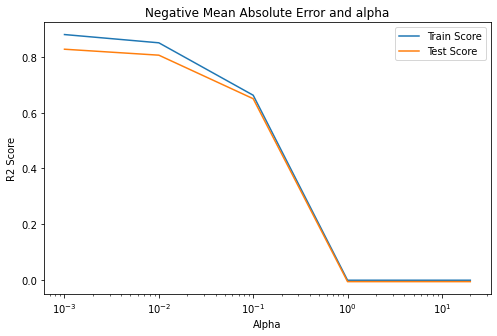

In [88]:
# Mean test and train scores plot with alpha.
plt.figure(figsize=(8,5))
plt.plot(cv_result_l["param_alpha"], cv_result_l["mean_train_score"])
plt.plot(cv_result_l["param_alpha"], cv_result_l["mean_test_score"])
plt.xscale("log")
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(["Train Score", "Test Score"], loc = "upper right")
plt.ylabel("R2 Score")
plt.xlabel("Alpha")
plt.show()

In [89]:
# Best Alpha value for model:
model_cv.best_params_

{'alpha': 0.001}

In [90]:
# Using optimal value of alpha obtained we will create new model using it:
lasso = Lasso(alpha = 0.001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [91]:
# Model predictions on train data and test data:
y_train_pred = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)

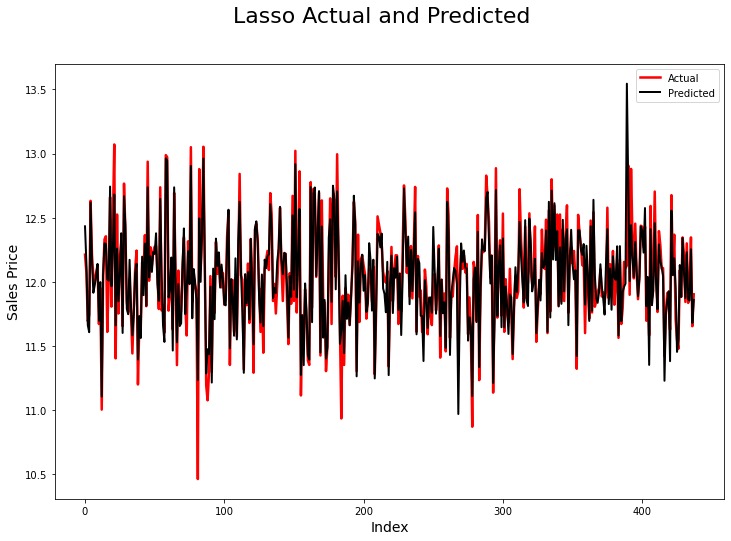

In [92]:
# Lasso Regression [ Actual vs Predicted] including all features:

a = [i for i in range(0, y_test.shape[0], 1)]
fig = plt.figure(figsize = (12, 8))

plt.plot(a, y_test, color = "red", linewidth = 2.5, linestyle = "-")
plt.plot(a, y_test_pred_lasso, color = "black",  linewidth = 2.0, linestyle = "-")

fig.suptitle(" Lasso Actual and Predicted", fontsize=22)               
plt.legend(["Actual", "Predicted"], loc = "upper right")
plt.xlabel('Index', fontsize = 14)                               
plt.ylabel('Sales Price', fontsize = 14)                         
plt.show()

In [93]:
# R-Squared score of model for Train and Test data:
print(r2_score(y_true = y_train, y_pred = y_train_pred))
print(r2_score(y_true = y_test, y_pred = y_test_pred_lasso))

0.8778232488260385
0.8602367097656218


In [94]:
# Create a dataframe for getting the coefficient according to features:
model_param = list(lasso.coef_)
model_param.insert(0, lasso.intercept_)
cols = X_train.columns
cols.insert(0, "const")

lasso_coef = pd.DataFrame(list(zip(cols, model_param)))
lasso_coef.columns = ["Feature", "Coefficient"]

In [95]:
# Features sorted based on Coefficients:
lasso_coef.sort_values(by = "Coefficient", ascending = False)

,Feature,Coefficient
0,OverallQual,11.920351
7,GarageCars,0.118009
1,OverallCond,0.115752
6,2ndFlrSF,0.112371
16,Neighborhood_Mitchel,0.097407
19,Neighborhood_StoneBr,0.075851
20,Neighborhood_Veenker,0.072108
31,Exterior1st_CBlock,0.069501
8,HouseAge,0.065137
10,MSZoning_RH,0.064643


### 7.3 Ridge Regression

In [96]:
# Ridge()object creation and fit train data:
ridge = Ridge(alpha = 0.001)
ridge.fit(X_train, y_train)

Ridge(alpha=0.001)

In [97]:
# Prediction of model on train data, test data:
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

In [98]:
# R-Squared score of model for Train and Test data:
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.8945210338803878
0.8455262502521589


>Alpha value is not optimal for ridge there signs of overfitting the visible difference between the train and test score
->Better to find the optimal value of alpha using GridSearchCV

In [99]:
# GridSearchCV for different values of alpha, Cross Validation:
folds  = KFold(n_splits = 10, shuffle = True, random_state = 42)

Hyperparameter = {"alpha" : [0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

Ridge_model = Ridge()

model_cv = GridSearchCV(estimator = Ridge_model,
                        param_grid = Hyperparameter,
                        scoring = "r2",
                        cv = folds,
                        verbose = 1,
                        return_train_score = True)

model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [100]:
# Mean test and train scores with alpha:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r["param_alpha"] = cv_result_r["param_alpha"].astype("float32")
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.013645,0.007901,0.005497,0.001024,0.001,{'alpha': 0.001},0.913963,0.904223,0.222179,0.878709,0.907121,0.915586,0.911771,0.911333,0.901992,0.901081,0.836796,0.205116,7,0.891230,0.891898,0.929623,0.893923,0.892077,0.891789,0.892074,0.889683,0.893341,0.893053,0.895869,0.011307
1,0.008695,0.001005,0.005296,0.000458,0.010,{'alpha': 0.01},0.914242,0.903969,0.222106,0.879373,0.907212,0.915672,0.911800,0.911127,0.901988,0.901229,0.836872,0.205158,6,0.891228,0.891897,0.929622,0.893921,0.892075,0.891788,0.892073,0.889682,0.893340,0.893052,0.895868,0.011307
2,0.008496,0.000921,0.005596,0.000799,0.100,{'alpha': 0.1},0.916335,0.901548,0.221341,0.884798,0.908019,0.916366,0.912069,0.909155,0.901956,0.902376,0.837396,0.205538,3,0.891075,0.891798,0.929532,0.893757,0.891962,0.891679,0.891966,0.889601,0.893237,0.892939,0.895755,0.011313
3,0.013892,0.013307,0.005197,0.000748,0.200,{'alpha': 0.2},0.917673,0.899154,0.220445,0.888967,0.908743,0.916903,0.912332,0.907195,0.901945,0.903193,0.837655,0.205898,1,0.890740,0.891579,0.929320,0.893388,0.891695,0.891425,0.891714,0.889422,0.892995,0.892679,0.895496,0.011326
4,0.007496,0.001565,0.004697,0.001188,0.500,{'alpha': 0.5},0.919072,0.893669,0.217732,0.895615,0.910274,0.917769,0.912977,0.902704,0.902008,0.904453,0.837627,0.206792,2,0.889477,0.890737,0.928442,0.891961,0.890574,0.890371,0.890656,0.888735,0.891975,0.891606,0.894453,0.011372


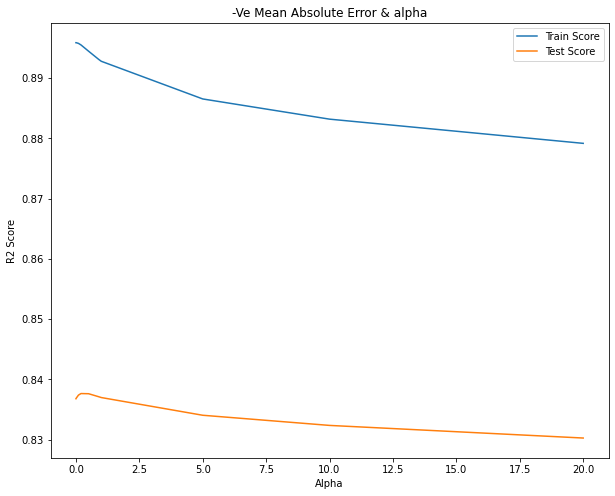

In [101]:
# Plotting mean test and train scoes with alpha.
plt.figure(figsize = (10,8))
plt.plot(cv_result_r["param_alpha"], cv_result_r["mean_train_score"])
plt.plot(cv_result_r["param_alpha"], cv_result_r["mean_test_score"])
plt.legend(["Train Score", "Test Score"], loc = "upper right")
plt.title("-Ve Mean Absolute Error & alpha")
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.show()

In [102]:
# Finding best parameter Alpha value :
model_cv.best_params_

{'alpha': 0.2}

In [103]:
# Ridge() object creation, fit data to model with optimal alpha:
ridge = Ridge(alpha = 0.2)
ridge.fit(X_train, y_train)

Ridge(alpha=0.2)

In [104]:
# Prediction of model on train data, test data:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

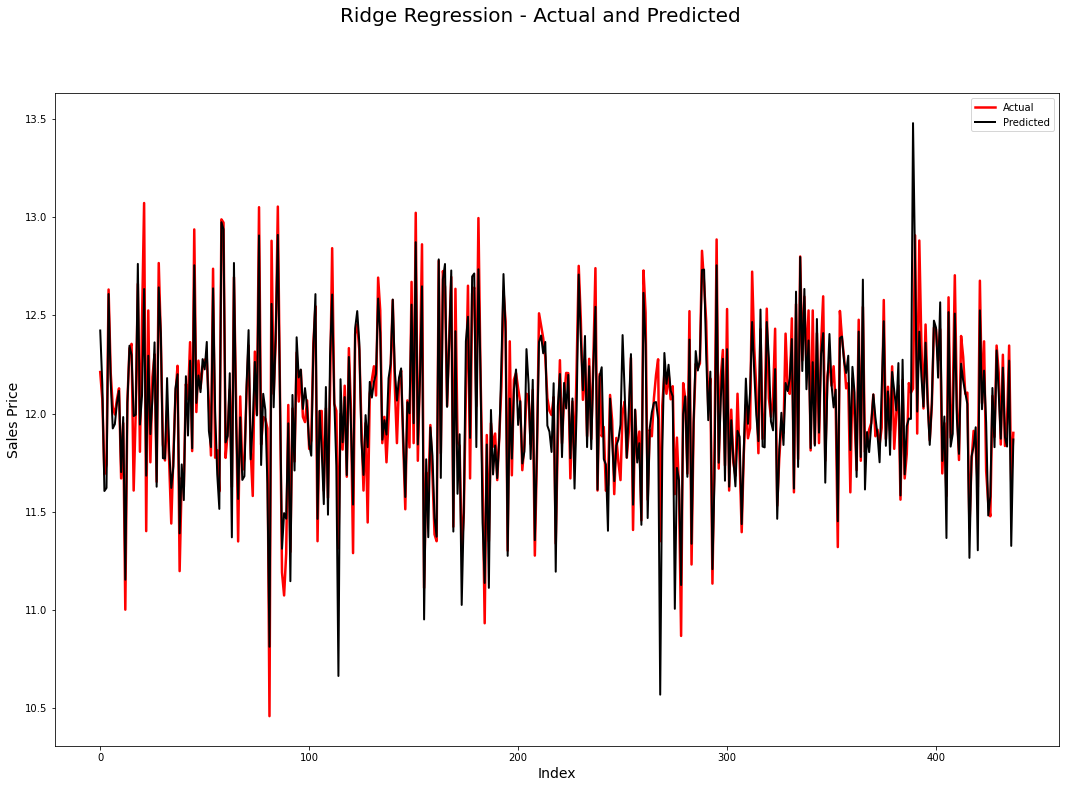

In [105]:
# Ridge Regression All features: Actual vs Predicted
a = [i for i in range(0, y_test.shape[0], 1)]
fig = plt.figure(figsize = (18, 12))

plt.plot(a, y_test, color = "red", linewidth = 2.5, linestyle = "-")
plt.plot(a, y_test_pred, color = "black",  linewidth = 2.0, linestyle = "-")

fig.suptitle("Ridge Regression - Actual and Predicted", fontsize=20)               
plt.legend(["Actual", "Predicted"], loc = "upper right")
plt.xlabel('Index', fontsize = 14)                               
plt.ylabel('Sales Price', fontsize = 14)                         
plt.show()

In [106]:
# R-Squared score of model both for Train and Test data:
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

0.8942033083993248
0.8517412543312759


In [107]:
# Dataframe creation for optimul coefficient according to features.
model_parameter = list(ridge.coef_)
model_parameter.insert(0, ridge.intercept_)
cols = X_train.columns
cols.insert(0, "constant")
ridge_coef = pd.DataFrame(list(zip(cols, model_parameter)))
ridge_coef.columns = ["Feature", "Coefficient"]

In [108]:
# Sort the variables based on Coefficient:
ridge_coef.sort_values(by = "Coefficient", ascending = False)

,Feature,Coefficient
0,OverallQual,11.435334
10,MSZoning_RH,0.466512
11,MSZoning_RL,0.414659
12,MSZoning_RM,0.408606
13,LotConfig_FR3,0.335270
48,SaleType_WD,0.215108
20,Neighborhood_Veenker,0.156402
47,SaleType_Oth,0.145504
45,SaleType_ConLD,0.129494
7,GarageCars,0.128000


### Conclusion:

### After implmenting a Lasso and Ridge Models:
1. Lasso Regression Model :
- The R-Sqaured score of model for Train Data is = <font color = "red">0.877/font> TheR-Squared score of model for Test Data is = <font color = "red">0.860/font>
- The optimum alpha value for lasso model = <font color "red">0.001</font>
2. Ridge Regression Model :
- R-Squared score of model for Train Data is = <font color = "red">0.894</font>
  R-Squared score of model for Test Data is = <font color = "red">0.851</font>
- Optimum alpha value for Ridge Model is = <font color = "red">0.2</font>



##### <font color = "Green">Lasso and Ridge models were created both Ridge and Lasso Regression we can see that the R-Squared score for Ridge on Train Data is better than Lasso.
##### <font color = "green">Lasso model has a better R-Squared score for Test Data than Ridge. 
##### <font color = "green">Lasso is providing better score on Test Data Thus it will be chosen <font size = 5>Lasso model is the final model. </font>

##### After comparing both the model the models providing the below features as best explaining -
#####  Top features affecting House Prices based on Lasso Regression Model: 
1. OverallQual 	11.920351
2. GarageCars 	0.118009
3. OverallCond 	0.115752
4. 2ndFlrSF 	0.112371
5. Neighborhood_Mitchel 	0.097407
6. Neighborhood_StoneBr 	0.075851
7. Neighborhood_Veenker 	0.072108
8. Exterior1st_CBlock 	    0.069501
9. HouseAge 	    0.065137
10. MSZoning_RH 	0.064643
11. BsmtFinType1 	0.064323
12. MSZoning_RM 	0.053238
13. Condition1_PosA 0.050056
14. BsmtFinSF2 	    0.041667
15. SaleType_Oth 	0.036798       

##### Top features affecting House Prices based on Ridge Regression Model :
1.  OverallQual 	11.435334
2. 	MSZoning_RH 	0.466512
3. 	MSZoning_RL 	0.414659
4. 	MSZoning_RM 	0.408606
5. 	LotConfig_FR3 	0.335270
6. 	SaleType_WD 	0.215108
7. 	Neighborhood_Veenker 	0.156402
8. 	SaleType_Oth 	0.145504
9. 	SaleType_ConLD 	0.129494
10. GarageCars 	    0.128000
11. Neighborhood_Mitchel 	0.123386
12. Neighborhood_StoneBr 	0.121592
13. 2ndFlrSF 	    0.118581
14. Foundation_Wood 0.117422
15. SaleType_Con 	0.116619    

###### Suggestions for Surprise Housing -

- These predictors affecting the price of the house should be kept in check.  
- The higher values of positive coefficients suggest a high sale value.
- The higher values of negative coeficients suggest a decrease in sale value.
- When the market value of the property is lower than the Predicted Sale Price, its the time to buy.
- When market values reach the Predicted sale values or higher, its time to flip.

#### Finding top features that describes the price of the house from both final models created using Lasso and Ridge and then choosing the below feature accordingly.

1. OverallQual
2. MSZoning
3. LotConfig
4. SaleType
5. Neighborhood
6. GarageCars 
7. Exterior1st_CBlock
8. OverallCond 
9. House_Age
10. SaleCondition
11. OverallCond

# Subjective Questions:

## Question 1.
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the changes is implemented?

### Answer :

### Ridge Regression:
- Current optimal alpha for ridge regression is 0.2, doubling it and feeding it in the model as 0.4.

In [109]:
# Ridge Regression with 0.4 alpha:
ridge = Ridge(alpha = 0.4)
ridge.fit(X_train, y_train)

Ridge(alpha=0.4)

In [110]:
# Model prediction on train data and test data:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

In [111]:
# R-Squared score of model on Train and Test data:
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

0.8935985468917034
0.8551268357286768


In [112]:
# Dataframe created to get the coefficient as per features:
model_parameter = list(ridge.coef_)
model_parameter.insert(0, ridge.intercept_)
cols = X_train.columns
cols.insert(0, "constant")
ridge_coef = pd.DataFrame(list(zip(cols, model_parameter)))
ridge_coef.columns = ["Feature", "Coefficient"]

In [113]:
# Fetaures sorting based on coff. value:

ridge_coef.sort_values(by = "Coefficient", ascending = False)

,Feature,Coefficient
0,OverallQual,11.501259
10,MSZoning_RH,0.400664
11,MSZoning_RL,0.346604
12,MSZoning_RM,0.345172
13,LotConfig_FR3,0.271928
48,SaleType_WD,0.198507
20,Neighborhood_Veenker,0.153107
47,SaleType_Oth,0.129255
7,GarageCars,0.127775
16,Neighborhood_Mitchel,0.123564


## Lasso Model:
- Dobling the optimum alpha from 0.001 to 0.002:

In [114]:
# Lasso Regression with 0.002 alpha:
lasso = Lasso(alpha = 0.002)
lasso.fit(X_train, y_train)

Lasso(alpha=0.002)

In [115]:
# Model prediction on train data and test data:
y_train_pred = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)

In [116]:
# R-Squared score of model on Train and Test data:
print(r2_score(y_true = y_train, y_pred = y_train_pred))
print(r2_score(y_true = y_test, y_pred = y_test_pred_lasso))

0.8696938588799473
0.8537407756639152


In [117]:
# Dataframe created to get the coefficient as per features:
model_param = list(lasso.coef_)
model_param.insert(0, lasso.intercept_)
cols = X_train.columns
cols.insert(0, "const")
lasso_coef = pd.DataFrame(list(zip(cols, model_param)))
lasso_coef.columns = ["Feature", "Coefficient"]

In [118]:
# Fetaures sorting based on coff. value:
lasso_coef.sort_values(by = "Coefficient", ascending = False)

,Feature,Coefficient
0,OverallQual,11.970515
1,OverallCond,0.124028
6,2ndFlrSF,0.112522
7,GarageCars,0.109783
8,HouseAge,0.067643
16,Neighborhood_Mitchel,0.066710
2,BsmtFinType1,0.063261
22,Condition1_PosA,0.043119
3,BsmtFinSF2,0.040854
19,Neighborhood_StoneBr,0.037218


### Question 3.
After building the model, you realized that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important variables now?

#### Answer :-

Top 5 features Lasso Model with optimum alpha:
1. OverallQual 
2. GarageCars 
3. OverallCond 
4. 2ndFlrSF 
5. Neighborhood_Mitchel 
*Lets drop those to see the change:

In [119]:
# Data Dimensions:
X_train.shape

(1021, 50)

In [120]:
# Dropping top 5 features Train and Test:
X_train = X_train.drop(["OverallQual", "GarageCars", "OverallCond", "2ndFlrSF", "Neighborhood_Mitchel"], axis = 1)
X_test = X_test.drop(["OverallQual", "GarageCars", "OverallCond", "2ndFlrSF", "Neighborhood_Mitchel"], axis = 1)
print(X_train.shape)
print(X_test.shape)

(1021, 45)
(438, 45)


New Lasso Model Building:

In [121]:
# Optimal value of alpha and create new model using that alpha value.
lasso = Lasso(alpha = 0.001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [122]:
# Model Predection train/test data:
y_train_pred = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)

In [123]:
# R-Squared score of model for Train and Test data:
print(r2_score(y_true = y_train, y_pred = y_train_pred))
print(r2_score(y_true = y_test, y_pred = y_test_pred_lasso))

0.7605951642211013
0.7390527269742893


In [124]:
# Coff.of features dataframe:
model_param = list(lasso.coef_)
model_param.insert(0, lasso.intercept_)
cols = X_train.columns
cols.insert(0, "const")
lasso_coef = pd.DataFrame(list(zip(cols, model_param)))
lasso_coef.columns = ["Feature", "Coefficient"]

In [125]:
# Sorted features based on Coefficient:
lasso_coef.sort_values(by = "Coefficient", ascending = False)

,Feature,Coefficient
0,BsmtFinType1,11.752551
23,RoofStyle_Shed,0.258873
36,GarageType_Detchd,0.246021
12,Neighborhood_NWAmes,0.217751
15,Neighborhood_Veenker,0.192540
14,Neighborhood_StoneBr,0.186199
4,HouseAge,0.172327
35,GarageType_BuiltIn,0.106613
6,MSZoning_RH,0.100367
42,SaleType_Oth,0.090852
